In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading data into dataframe

data1 = pd.read_csv("more.csv")
benign_urls = data1[data1['Label'] == 0]
phishing_urls = data1[data1['Label'] == 1]
random_benign_urls = benign_urls.sample(n=20000, random_state=42)
random_phishing_urls = phishing_urls.sample(n=20000, random_state=42)
sampled_dataset = pd.concat([random_benign_urls, random_phishing_urls])
data = sampled_dataset.sample(frac=1).reset_index(drop=True)
data.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,espn.go.com,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tinyurl.com,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,onedio.com,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,pornsharing.com,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,cloudflare-ipfs.com,0,0,1,3,0,0,0,1,0,0,0,0,0,0,0,0,1


In [3]:
#Shape of dataframe

data.shape

(40000, 18)

In [4]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         40000 non-null  object
 1   Have_IP        40000 non-null  int64 
 2   Have_At        40000 non-null  int64 
 3   URL_Length     40000 non-null  int64 
 4   URL_Depth      40000 non-null  int64 
 5   Redirection    40000 non-null  int64 
 6   https_Domain   40000 non-null  int64 
 7   TinyURL        40000 non-null  int64 
 8   Prefix/Suffix  40000 non-null  int64 
 9   DNS_Record     40000 non-null  int64 
 10  Web_Traffic    40000 non-null  int64 
 11  Domain_Age     40000 non-null  int64 
 12  Domain_End     40000 non-null  int64 
 13  iFrame         40000 non-null  int64 
 14  Mouse_Over     40000 non-null  int64 
 15  Right_Click    40000 non-null  int64 
 16  Web_Forwards   40000 non-null  int64 
 17  Label          40000 non-null  int64 
dtypes: int64(17), object(1)
me

In [5]:
# nunique value in columns

data.nunique()

Domain           13309
Have_IP              1
Have_At              2
URL_Length           2
URL_Depth           20
Redirection          2
https_Domain         2
TinyURL              2
Prefix/Suffix        2
DNS_Record           1
Web_Traffic          1
Domain_Age           1
Domain_End           1
iFrame               1
Mouse_Over           1
Right_Click          1
Web_Forwards         1
Label                2
dtype: int64

In [6]:
#droping index column

data = data.drop(['Domain'],axis = 1)

In [7]:
#description of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Have_IP,40000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Have_At,40000.0,0.009100,0.094960,0.0,0.0,0.0,0.0,1.0
URL_Length,40000.0,0.713675,0.452049,0.0,0.0,1.0,1.0,1.0
URL_Depth,40000.0,2.257675,2.077050,0.0,1.0,2.0,3.0,32.0
Redirection,40000.0,0.011975,0.108775,0.0,0.0,0.0,0.0,1.0
https_Domain,40000.0,0.000275,0.016581,0.0,0.0,0.0,0.0,1.0
TinyURL,40000.0,0.056175,0.230262,0.0,0.0,0.0,0.0,1.0
Prefix/Suffix,40000.0,0.209500,0.406957,0.0,0.0,0.0,0.0,1.0
DNS_Record,40000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Web_Traffic,40000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


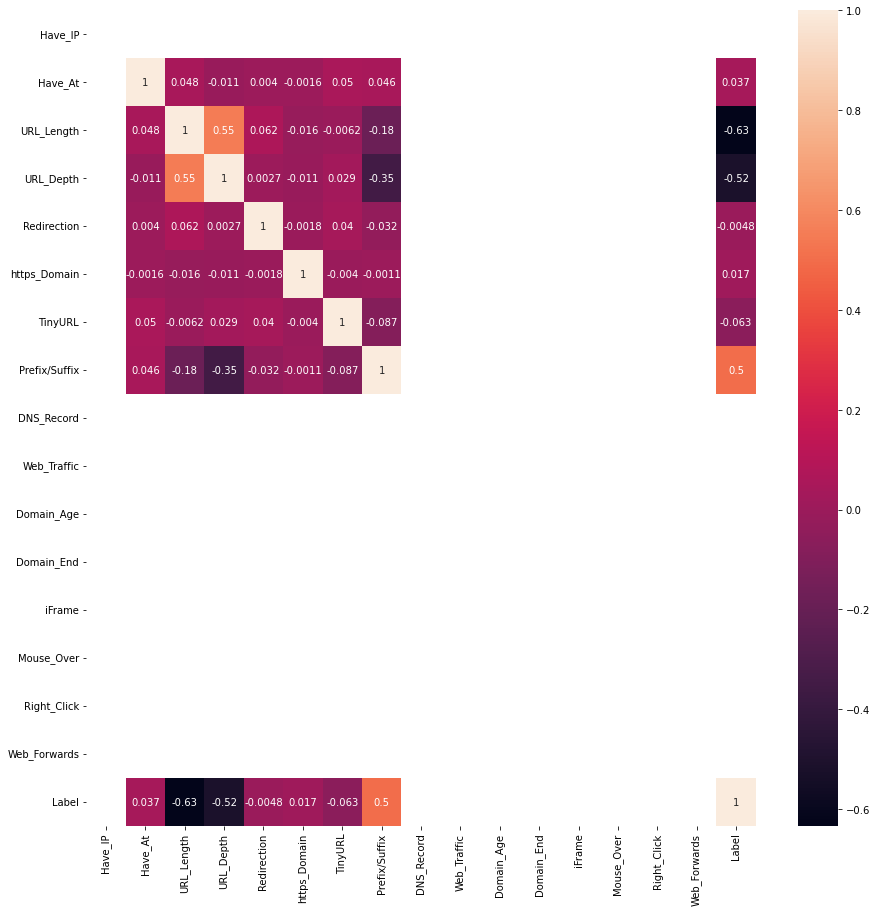

In [8]:
#Correlation heatmap

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [9]:
print(data.columns)


Index(['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
       'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic',
       'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over', 'Right_Click',
       'Web_Forwards', 'Label'],
      dtype='object')


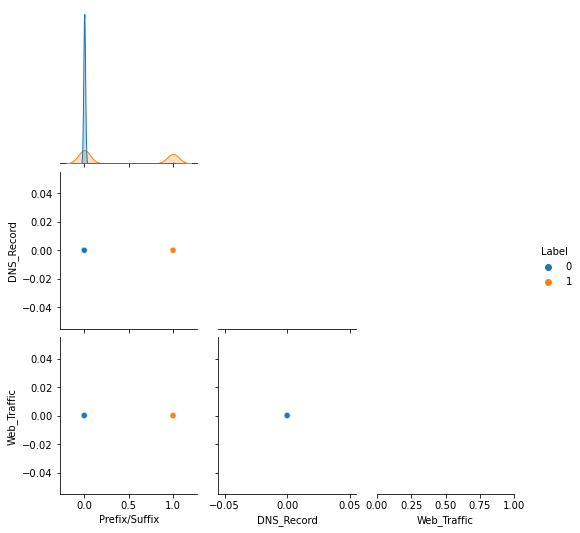

In [10]:
#pairplot for particular features

#df = data[['PrefixSuffix-', 'SubDomains', 'HTTPS','AnchorURL','WebsiteTraffic','class']]
#sns.pairplot(data = df,hue="class",corner=True);

# Select relevant columns
df = data[['Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 'Label']]

# Plot pairplot
sns.pairplot(data=df, hue="Label", corner=True);





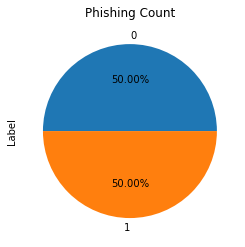

In [11]:
# Phishing Count in pie chart

data['Label'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

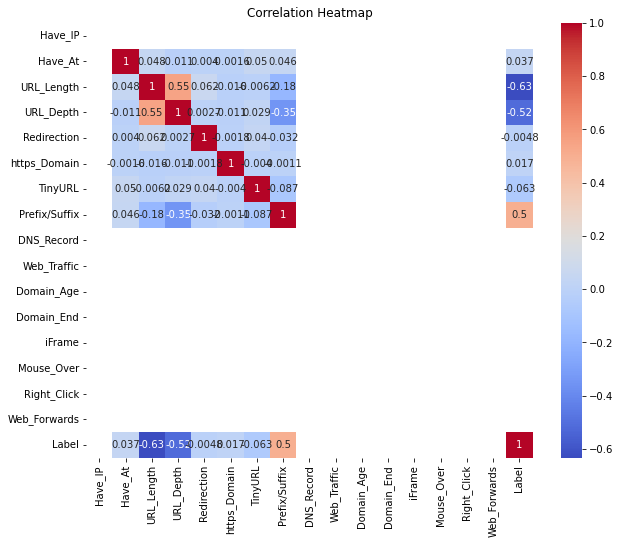

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



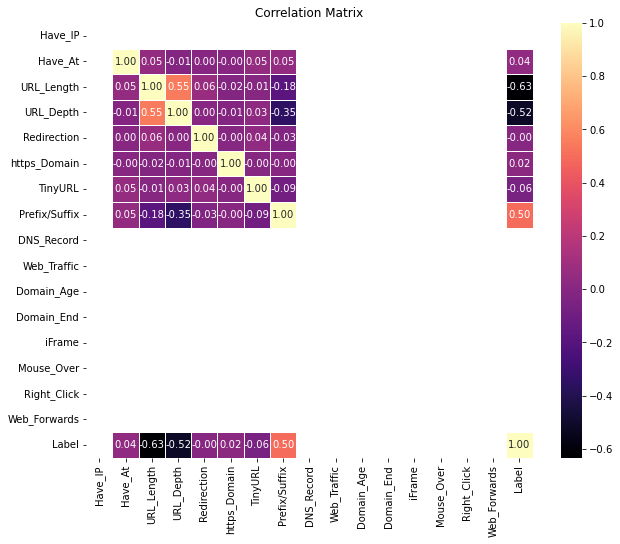

In [13]:
import seaborn as sns

# Compute the correlation matrix
corr = data.corr()

# Plot the correlation matrix as a heatmap with a different colormap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)  # Change 'magma' to any other colormap you prefer
plt.title('Correlation Matrix')
plt.show()


In [14]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["Label"],axis =1)
y = data["Label"]

In [15]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((32000, 16), (32000,), (8000, 16), (8000,))

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Performing k-fold cross-validation
kf = StratifiedKFold(n_splits=10, random_state=2, shuffle=True)

# Initializing RFECV with Random Forest as the estimator
rfecv = RFECV(estimator=RandomForestClassifier(), min_features_to_select=3, cv=kf, scoring='accuracy')

# Fitting RFECV on the training data
rfecv.fit(X_train_scaled, y_train)

# Creating an empty DataFrame with column names
df_features = pd.DataFrame(columns=['feature', 'support', 'ranking'])

# Loop through the features and append each row to the DataFrame
for i in range(X.shape[1]):
    row = {'feature': X.columns[i], 'support': rfecv.support_[i], 'ranking': rfecv.ranking_[i]}
    df_features = pd.concat([df_features, pd.DataFrame([row])], ignore_index=True)

# Sorting the DataFrame based on feature ranking
df_features = df_features.sort_values(by='ranking')

# Filtering out features selected by RFECV
df_features = df_features[df_features['support']]

# Extracting the names of selected features
best_features = df_features['feature'].tolist()

# Selecting only the best features
X_train_selected = X_train[best_features]
X_test_selected = X_test[best_features]

# Get feature importances from the RandomForestClassifier
feature_importances = rfecv.estimator_.feature_importances_

# Combine features and importances into a list of tuples
feature_scores = list(zip(best_features, feature_importances))

# Sort features based on importance scores in descending order
sorted_features = sorted(feature_scores, key=lambda x: x[1], reverse=True)

# Print the selected features along with their importance scores in descending order
print("Selected Features and Importance Scores (Descending Order):")
for feature, score in sorted_features:
    print(f"{feature}: {score}")


Selected Features and Importance Scores (Descending Order):
URL_Length: 0.42489882120072187
Prefix/Suffix: 0.29421492179568043
URL_Depth: 0.2652172343518345
TinyURL: 0.006437025343296517
Redirection: 0.004577192575357819
Have_At: 0.00446149129567774
https_Domain: 0.0001933134374312518
Web_Traffic: 0.0
Domain_Age: 0.0
Domain_End: 0.0
iFrame: 0.0
Mouse_Over: 0.0
Right_Click: 0.0
Web_Forwards: 0.0


In [17]:
best_features=['URL_Length','Prefix/Suffix','URL_Depth','TinyURL','Redirection','Have_At']
# Subset the training and test datasets to include only the selected features
X= X[best_features]
# X_test_selected = X_test[selected_features]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((32000, 6), (32000,), (8000, 6), (8000,))

In [18]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

In [19]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

LogisticRegression()

In [20]:
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [21]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.896
Logistic Regression : Accuracy on test Data: 0.903

Logistic Regression : f1_score on training Data: 0.885
Logistic Regression : f1_score on test Data: 0.892

Logistic Regression : Recall on training Data: 0.798
Logistic Regression : Recall on test Data: 0.810

Logistic Regression : precision on training Data: 0.994
Logistic Regression : precision on test Data: 0.993


In [22]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      4058
           1       0.99      0.81      0.89      3942

    accuracy                           0.90      8000
   macro avg       0.92      0.90      0.90      8000
weighted avg       0.92      0.90      0.90      8000



In [23]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

<AxesSubplot:>

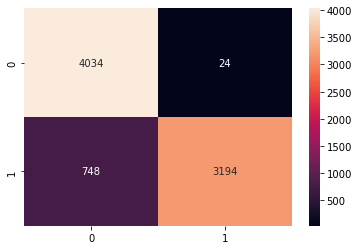

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_log)
sns.heatmap(confusion_matrix(y_test, y_test_log), annot = True, fmt='0.0f')

In [25]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [27]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.905
K-Nearest Neighbors : Accuracy on test Data: 0.908

K-Nearest Neighbors : f1_score on training Data: 0.897
K-Nearest Neighbors : f1_score on test Data: 0.900

K-Nearest Neighborsn : Recall on training Data: 0.826
Logistic Regression : Recall on test Data: 0.834

K-Nearest Neighbors : precision on training Data: 0.981
K-Nearest Neighbors : precision on test Data: 0.977


In [28]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      4058
           1       0.98      0.83      0.90      3942

    accuracy                           0.91      8000
   macro avg       0.92      0.91      0.91      8000
weighted avg       0.92      0.91      0.91      8000



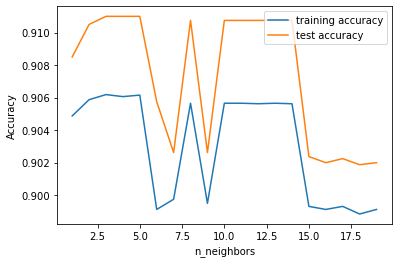

In [29]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();

In [30]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

<AxesSubplot:>

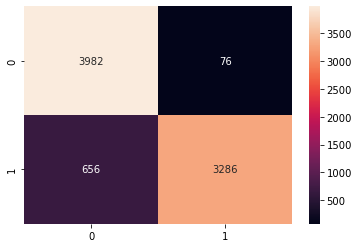

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_knn)
sns.heatmap(confusion_matrix(y_test, y_test_knn), annot = True, fmt='0.0f')

In [32]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [33]:
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [34]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.904
Support Vector Machine : Accuracy on test Data: 0.909

Support Vector Machine : f1_score on training Data: 0.896
Support Vector Machine : f1_score on test Data: 0.900

Support Vector Machine : Recall on training Data: 0.819
Support Vector Machine : Recall on test Data: 0.827

Support Vector Machine : precision on training Data: 0.989
Support Vector Machine : precision on test Data: 0.987


In [35]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      4058
           1       0.99      0.83      0.90      3942

    accuracy                           0.91      8000
   macro avg       0.92      0.91      0.91      8000
weighted avg       0.92      0.91      0.91      8000



<AxesSubplot:>

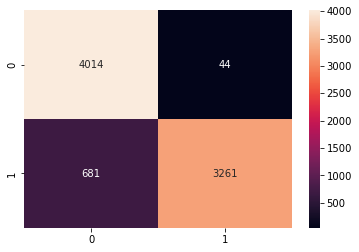

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_svc)
sns.heatmap(confusion_matrix(y_test, y_test_svc), annot = True, fmt='0.0f')

In [37]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

In [38]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

GaussianNB()

In [39]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [40]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.895
Naive Bayes Classifier : Accuracy on test Data: 0.902

Naive Bayes Classifier : f1_score on training Data: 0.884
Naive Bayes Classifier : f1_score on test Data: 0.891

Naive Bayes Classifier : Recall on training Data: 0.800
Naive Bayes Classifier : Recall on test Data: 0.813

Naive Bayes Classifier : precision on training Data: 0.987
Naive Bayes Classifier : precision on test Data: 0.986


In [41]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      4058
           1       0.99      0.83      0.90      3942

    accuracy                           0.91      8000
   macro avg       0.92      0.91      0.91      8000
weighted avg       0.92      0.91      0.91      8000



<AxesSubplot:>

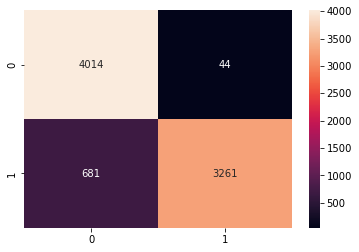

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_svc)
sns.heatmap(confusion_matrix(y_test, y_test_svc), annot = True, fmt='0.0f')

In [43]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

In [44]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [45]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [46]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 0.906
Decision Tree : Accuracy on test Data: 0.911

Decision Tree : f1_score on training Data: 0.898
Decision Tree : f1_score on test Data: 0.902

Decision Tree : Recall on training Data: 0.822
Decision Tree : Recall on test Data: 0.830

Decision Tree : precision on training Data: 0.989
Decision Tree : precision on test Data: 0.988


In [47]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      4058
           1       0.99      0.83      0.90      3942

    accuracy                           0.91      8000
   macro avg       0.92      0.91      0.91      8000
weighted avg       0.92      0.91      0.91      8000



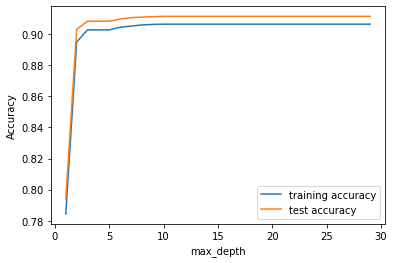

In [48]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [49]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

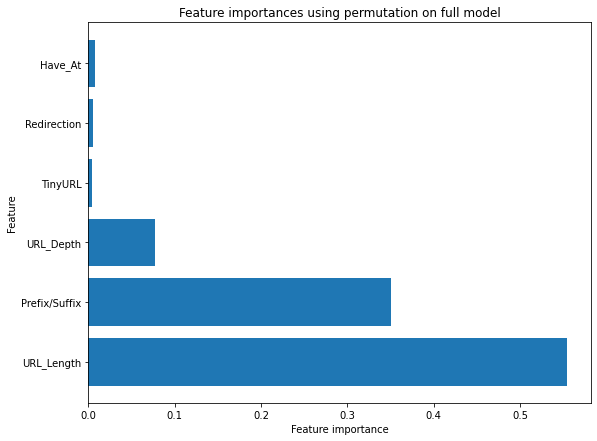

In [50]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [51]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [52]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [53]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.906
Random Forest : Accuracy on test Data: 0.911

Random Forest : f1_score on training Data: 0.898
Random Forest : f1_score on test Data: 0.902

Random Forest : Recall on training Data: 0.822
Random Forest : Recall on test Data: 0.830

Random Forest : precision on training Data: 0.989
Random Forest : precision on test Data: 0.988


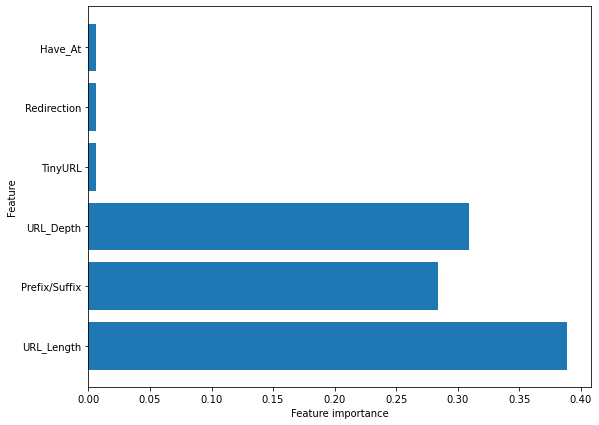

In [54]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [55]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      4058
           1       0.99      0.83      0.90      3942

    accuracy                           0.91      8000
   macro avg       0.92      0.91      0.91      8000
weighted avg       0.92      0.91      0.91      8000



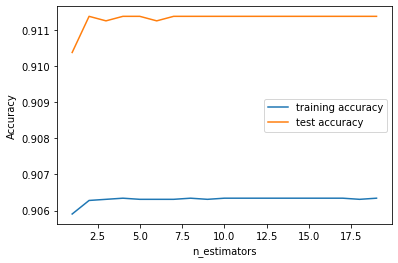

In [56]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [57]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

In [58]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [59]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [60]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.906
Gradient Boosting Classifier : Accuracy on test Data: 0.911

Gradient Boosting Classifier : f1_score on training Data: 0.898
Gradient Boosting Classifier : f1_score on test Data: 0.902

Gradient Boosting Classifier : Recall on training Data: 0.822
Gradient Boosting Classifier : Recall on test Data: 0.830

Gradient Boosting Classifier : precision on training Data: 0.989
Gradient Boosting Classifier : precision on test Data: 0.988


In [61]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      4058
           1       0.99      0.83      0.90      3942

    accuracy                           0.91      8000
   macro avg       0.92      0.91      0.91      8000
weighted avg       0.92      0.91      0.91      8000



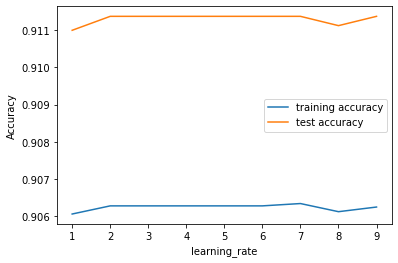

In [62]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

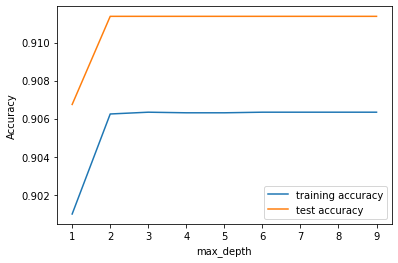

In [63]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [64]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

## 5.8. CatBoost Classifier

CatBoost is a recently open-sourced machine learning algorithm from Yandex. It can easily integrate with deep learning frameworks like Google’s TensorFlow and Apple’s Core ML. It can work with diverse data types to help solve a wide range of problems that businesses face today.

In [65]:
#  catboost Classifier Model
from catboost import CatBoostClassifier

# instantiate the model
cat = CatBoostClassifier(learning_rate  = 0.1)

# fit the model 
cat.fit(X_train,y_train)

0:	learn: 0.5459018	total: 169ms	remaining: 2m 48s
1:	learn: 0.4555833	total: 180ms	remaining: 1m 29s
2:	learn: 0.3978666	total: 192ms	remaining: 1m 3s
3:	learn: 0.3550645	total: 205ms	remaining: 51s
4:	learn: 0.3321026	total: 215ms	remaining: 42.7s
5:	learn: 0.3161088	total: 226ms	remaining: 37.4s
6:	learn: 0.2997705	total: 239ms	remaining: 33.9s
7:	learn: 0.2919413	total: 249ms	remaining: 30.9s
8:	learn: 0.2817600	total: 261ms	remaining: 28.7s
9:	learn: 0.2741357	total: 271ms	remaining: 26.9s
10:	learn: 0.2675884	total: 282ms	remaining: 25.4s
11:	learn: 0.2628243	total: 294ms	remaining: 24.2s
12:	learn: 0.2591509	total: 305ms	remaining: 23.2s
13:	learn: 0.2567529	total: 317ms	remaining: 22.3s
14:	learn: 0.2544476	total: 329ms	remaining: 21.6s
15:	learn: 0.2514811	total: 343ms	remaining: 21.1s
16:	learn: 0.2495295	total: 355ms	remaining: 20.5s
17:	learn: 0.2476845	total: 369ms	remaining: 20.1s
18:	learn: 0.2458388	total: 405ms	remaining: 20.9s
19:	learn: 0.2447020	total: 420ms	remaini

169:	learn: 0.2322919	total: 2.17s	remaining: 10.6s
170:	learn: 0.2322919	total: 2.19s	remaining: 10.6s
171:	learn: 0.2322919	total: 2.2s	remaining: 10.6s
172:	learn: 0.2322919	total: 2.21s	remaining: 10.5s
173:	learn: 0.2322919	total: 2.22s	remaining: 10.5s
174:	learn: 0.2322919	total: 2.23s	remaining: 10.5s
175:	learn: 0.2322919	total: 2.24s	remaining: 10.5s
176:	learn: 0.2322919	total: 2.25s	remaining: 10.5s
177:	learn: 0.2322919	total: 2.26s	remaining: 10.4s
178:	learn: 0.2322919	total: 2.27s	remaining: 10.4s
179:	learn: 0.2322919	total: 2.28s	remaining: 10.4s
180:	learn: 0.2322919	total: 2.29s	remaining: 10.3s
181:	learn: 0.2322919	total: 2.3s	remaining: 10.3s
182:	learn: 0.2322919	total: 2.31s	remaining: 10.3s
183:	learn: 0.2322919	total: 2.32s	remaining: 10.3s
184:	learn: 0.2322919	total: 2.33s	remaining: 10.3s
185:	learn: 0.2322919	total: 2.34s	remaining: 10.2s
186:	learn: 0.2322919	total: 2.35s	remaining: 10.2s
187:	learn: 0.2322919	total: 2.36s	remaining: 10.2s
188:	learn: 0.

328:	learn: 0.2322919	total: 3.74s	remaining: 7.63s
329:	learn: 0.2322919	total: 3.75s	remaining: 7.62s
330:	learn: 0.2322919	total: 3.77s	remaining: 7.61s
331:	learn: 0.2322919	total: 3.79s	remaining: 7.62s
332:	learn: 0.2322919	total: 3.8s	remaining: 7.61s
333:	learn: 0.2322919	total: 3.81s	remaining: 7.6s
334:	learn: 0.2322919	total: 3.82s	remaining: 7.58s
335:	learn: 0.2322919	total: 3.83s	remaining: 7.57s
336:	learn: 0.2322919	total: 3.84s	remaining: 7.55s
337:	learn: 0.2322919	total: 3.85s	remaining: 7.54s
338:	learn: 0.2322919	total: 3.86s	remaining: 7.52s
339:	learn: 0.2322919	total: 3.87s	remaining: 7.51s
340:	learn: 0.2322919	total: 3.88s	remaining: 7.49s
341:	learn: 0.2322919	total: 3.89s	remaining: 7.48s
342:	learn: 0.2322919	total: 3.9s	remaining: 7.46s
343:	learn: 0.2322919	total: 3.9s	remaining: 7.45s
344:	learn: 0.2322919	total: 3.91s	remaining: 7.43s
345:	learn: 0.2322919	total: 3.92s	remaining: 7.42s
346:	learn: 0.2322919	total: 3.94s	remaining: 7.41s
347:	learn: 0.23

500:	learn: 0.2322919	total: 5.46s	remaining: 5.43s
501:	learn: 0.2322919	total: 5.47s	remaining: 5.42s
502:	learn: 0.2322919	total: 5.48s	remaining: 5.41s
503:	learn: 0.2322919	total: 5.49s	remaining: 5.4s
504:	learn: 0.2322919	total: 5.5s	remaining: 5.39s
505:	learn: 0.2322919	total: 5.51s	remaining: 5.38s
506:	learn: 0.2322919	total: 5.52s	remaining: 5.36s
507:	learn: 0.2322919	total: 5.53s	remaining: 5.35s
508:	learn: 0.2322919	total: 5.54s	remaining: 5.34s
509:	learn: 0.2322919	total: 5.55s	remaining: 5.33s
510:	learn: 0.2322919	total: 5.55s	remaining: 5.32s
511:	learn: 0.2322919	total: 5.56s	remaining: 5.3s
512:	learn: 0.2322919	total: 5.57s	remaining: 5.29s
513:	learn: 0.2322919	total: 5.58s	remaining: 5.28s
514:	learn: 0.2322919	total: 5.59s	remaining: 5.27s
515:	learn: 0.2322919	total: 5.6s	remaining: 5.25s
516:	learn: 0.2322919	total: 5.61s	remaining: 5.24s
517:	learn: 0.2322919	total: 5.62s	remaining: 5.23s
518:	learn: 0.2322919	total: 5.63s	remaining: 5.22s
519:	learn: 0.23

676:	learn: 0.2322919	total: 7.23s	remaining: 3.45s
677:	learn: 0.2322919	total: 7.24s	remaining: 3.44s
678:	learn: 0.2322919	total: 7.25s	remaining: 3.43s
679:	learn: 0.2322919	total: 7.26s	remaining: 3.42s
680:	learn: 0.2322919	total: 7.27s	remaining: 3.4s
681:	learn: 0.2322919	total: 7.28s	remaining: 3.39s
682:	learn: 0.2322919	total: 7.29s	remaining: 3.38s
683:	learn: 0.2322919	total: 7.3s	remaining: 3.37s
684:	learn: 0.2322919	total: 7.31s	remaining: 3.36s
685:	learn: 0.2322919	total: 7.32s	remaining: 3.35s
686:	learn: 0.2322919	total: 7.33s	remaining: 3.34s
687:	learn: 0.2322919	total: 7.34s	remaining: 3.33s
688:	learn: 0.2322919	total: 7.35s	remaining: 3.31s
689:	learn: 0.2322919	total: 7.36s	remaining: 3.3s
690:	learn: 0.2322919	total: 7.36s	remaining: 3.29s
691:	learn: 0.2322919	total: 7.37s	remaining: 3.28s
692:	learn: 0.2322919	total: 7.38s	remaining: 3.27s
693:	learn: 0.2322919	total: 7.39s	remaining: 3.26s
694:	learn: 0.2322919	total: 7.4s	remaining: 3.25s
695:	learn: 0.23

850:	learn: 0.2322919	total: 9.12s	remaining: 1.6s
851:	learn: 0.2322919	total: 9.13s	remaining: 1.58s
852:	learn: 0.2322919	total: 9.14s	remaining: 1.57s
853:	learn: 0.2322919	total: 9.15s	remaining: 1.56s
854:	learn: 0.2322919	total: 9.16s	remaining: 1.55s
855:	learn: 0.2322919	total: 9.17s	remaining: 1.54s
856:	learn: 0.2322919	total: 9.18s	remaining: 1.53s
857:	learn: 0.2322919	total: 9.19s	remaining: 1.52s
858:	learn: 0.2322919	total: 9.2s	remaining: 1.51s
859:	learn: 0.2322919	total: 9.21s	remaining: 1.5s
860:	learn: 0.2322919	total: 9.22s	remaining: 1.49s
861:	learn: 0.2322919	total: 9.23s	remaining: 1.48s
862:	learn: 0.2322919	total: 9.24s	remaining: 1.47s
863:	learn: 0.2322919	total: 9.25s	remaining: 1.46s
864:	learn: 0.2322919	total: 9.26s	remaining: 1.44s
865:	learn: 0.2322919	total: 9.27s	remaining: 1.43s
866:	learn: 0.2322919	total: 9.28s	remaining: 1.42s
867:	learn: 0.2322919	total: 9.29s	remaining: 1.41s
868:	learn: 0.2322919	total: 9.29s	remaining: 1.4s
869:	learn: 0.23

In [66]:
#predicting the target value from the model for the samples
y_train_cat = cat.predict(X_train)
y_test_cat = cat.predict(X_test)


In [67]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_cat  = metrics.accuracy_score(y_train,y_train_cat)
acc_test_cat = metrics.accuracy_score(y_test,y_test_cat)
print("CatBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_cat))
print("CatBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_cat))
print()

f1_score_train_cat = metrics.f1_score(y_train,y_train_cat)
f1_score_test_cat = metrics.f1_score(y_test,y_test_cat)
print("CatBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_cat))
print("CatBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_cat))
print()

recall_score_train_cat = metrics.recall_score(y_train,y_train_cat)
recall_score_test_cat = metrics.recall_score(y_test,y_test_cat)
print("CatBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_cat))
print("CatBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_cat))
print()

precision_score_train_cat = metrics.precision_score(y_train,y_train_cat)
precision_score_test_cat = metrics.precision_score(y_test,y_test_cat)
print("CatBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_cat))
print("CatBoost Classifier : precision on test Data: {:.3f}".format(precision_score_test_cat))

CatBoost Classifier : Accuracy on training Data: 0.906
CatBoost Classifier : Accuracy on test Data: 0.911

CatBoost Classifier : f1_score on training Data: 0.898
CatBoost Classifier : f1_score on test Data: 0.902

CatBoost Classifier : Recall on training Data: 0.822
CatBoost Classifier : Recall on test Data: 0.830

CatBoost Classifier : precision on training Data: 0.989
CatBoost Classifier : precision on test Data: 0.988


In [68]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_cat))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      4058
           1       0.99      0.83      0.90      3942

    accuracy                           0.91      8000
   macro avg       0.92      0.91      0.91      8000
weighted avg       0.92      0.91      0.91      8000



In [69]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  CatBoostClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

0:	learn: 0.5459018	total: 15.9ms	remaining: 15.9s
1:	learn: 0.4555833	total: 26.4ms	remaining: 13.2s
2:	learn: 0.3978666	total: 38.2ms	remaining: 12.7s
3:	learn: 0.3550645	total: 50.2ms	remaining: 12.5s
4:	learn: 0.3321026	total: 64ms	remaining: 12.7s
5:	learn: 0.3161088	total: 76.2ms	remaining: 12.6s
6:	learn: 0.2997705	total: 92.4ms	remaining: 13.1s
7:	learn: 0.2919413	total: 102ms	remaining: 12.7s
8:	learn: 0.2817600	total: 114ms	remaining: 12.6s
9:	learn: 0.2741357	total: 125ms	remaining: 12.4s
10:	learn: 0.2675884	total: 139ms	remaining: 12.5s
11:	learn: 0.2628243	total: 153ms	remaining: 12.6s
12:	learn: 0.2591509	total: 167ms	remaining: 12.6s
13:	learn: 0.2567529	total: 180ms	remaining: 12.7s
14:	learn: 0.2544476	total: 192ms	remaining: 12.6s
15:	learn: 0.2514811	total: 207ms	remaining: 12.7s
16:	learn: 0.2495295	total: 221ms	remaining: 12.8s
17:	learn: 0.2476845	total: 234ms	remaining: 12.8s
18:	learn: 0.2458388	total: 247ms	remaining: 12.7s
19:	learn: 0.2447020	total: 261ms	re

164:	learn: 0.2322919	total: 2.25s	remaining: 11.4s
165:	learn: 0.2322919	total: 2.27s	remaining: 11.4s
166:	learn: 0.2322919	total: 2.28s	remaining: 11.4s
167:	learn: 0.2322919	total: 2.29s	remaining: 11.4s
168:	learn: 0.2322919	total: 2.3s	remaining: 11.3s
169:	learn: 0.2322919	total: 2.32s	remaining: 11.3s
170:	learn: 0.2322919	total: 2.33s	remaining: 11.3s
171:	learn: 0.2322919	total: 2.34s	remaining: 11.3s
172:	learn: 0.2322919	total: 2.35s	remaining: 11.2s
173:	learn: 0.2322919	total: 2.36s	remaining: 11.2s
174:	learn: 0.2322919	total: 2.37s	remaining: 11.2s
175:	learn: 0.2322919	total: 2.38s	remaining: 11.1s
176:	learn: 0.2322919	total: 2.39s	remaining: 11.1s
177:	learn: 0.2322919	total: 2.41s	remaining: 11.1s
178:	learn: 0.2322919	total: 2.42s	remaining: 11.1s
179:	learn: 0.2322919	total: 2.43s	remaining: 11.1s
180:	learn: 0.2322919	total: 2.44s	remaining: 11s
181:	learn: 0.2322919	total: 2.45s	remaining: 11s
182:	learn: 0.2322919	total: 2.47s	remaining: 11s
183:	learn: 0.23229

331:	learn: 0.2322919	total: 4.14s	remaining: 8.33s
332:	learn: 0.2322919	total: 4.15s	remaining: 8.31s
333:	learn: 0.2322919	total: 4.16s	remaining: 8.3s
334:	learn: 0.2322919	total: 4.17s	remaining: 8.29s
335:	learn: 0.2322919	total: 4.19s	remaining: 8.27s
336:	learn: 0.2322919	total: 4.2s	remaining: 8.26s
337:	learn: 0.2322919	total: 4.21s	remaining: 8.25s
338:	learn: 0.2322919	total: 4.22s	remaining: 8.23s
339:	learn: 0.2322919	total: 4.23s	remaining: 8.22s
340:	learn: 0.2322919	total: 4.24s	remaining: 8.2s
341:	learn: 0.2322919	total: 4.25s	remaining: 8.19s
342:	learn: 0.2322919	total: 4.26s	remaining: 8.17s
343:	learn: 0.2322919	total: 4.28s	remaining: 8.15s
344:	learn: 0.2322919	total: 4.29s	remaining: 8.14s
345:	learn: 0.2322919	total: 4.29s	remaining: 8.12s
346:	learn: 0.2322919	total: 4.3s	remaining: 8.1s
347:	learn: 0.2322919	total: 4.32s	remaining: 8.08s
348:	learn: 0.2322919	total: 4.33s	remaining: 8.07s
349:	learn: 0.2322919	total: 4.34s	remaining: 8.05s
350:	learn: 0.232

492:	learn: 0.2322919	total: 5.89s	remaining: 6.06s
493:	learn: 0.2322919	total: 5.91s	remaining: 6.05s
494:	learn: 0.2322919	total: 5.92s	remaining: 6.04s
495:	learn: 0.2322919	total: 5.93s	remaining: 6.02s
496:	learn: 0.2322919	total: 5.93s	remaining: 6.01s
497:	learn: 0.2322919	total: 5.95s	remaining: 5.99s
498:	learn: 0.2322919	total: 5.96s	remaining: 5.98s
499:	learn: 0.2322919	total: 5.97s	remaining: 5.97s
500:	learn: 0.2322919	total: 5.98s	remaining: 5.96s
501:	learn: 0.2322919	total: 5.99s	remaining: 5.94s
502:	learn: 0.2322919	total: 6s	remaining: 5.93s
503:	learn: 0.2322919	total: 6.01s	remaining: 5.91s
504:	learn: 0.2322919	total: 6.02s	remaining: 5.9s
505:	learn: 0.2322919	total: 6.03s	remaining: 5.88s
506:	learn: 0.2322919	total: 6.04s	remaining: 5.87s
507:	learn: 0.2322919	total: 6.05s	remaining: 5.86s
508:	learn: 0.2322919	total: 6.06s	remaining: 5.84s
509:	learn: 0.2322919	total: 6.07s	remaining: 5.83s
510:	learn: 0.2322919	total: 6.08s	remaining: 5.82s
511:	learn: 0.23

653:	learn: 0.2322919	total: 7.63s	remaining: 4.03s
654:	learn: 0.2322919	total: 7.64s	remaining: 4.02s
655:	learn: 0.2322919	total: 7.65s	remaining: 4.01s
656:	learn: 0.2322919	total: 7.66s	remaining: 4s
657:	learn: 0.2322919	total: 7.67s	remaining: 3.99s
658:	learn: 0.2322919	total: 7.68s	remaining: 3.98s
659:	learn: 0.2322919	total: 7.69s	remaining: 3.96s
660:	learn: 0.2322919	total: 7.71s	remaining: 3.95s
661:	learn: 0.2322919	total: 7.72s	remaining: 3.94s
662:	learn: 0.2322919	total: 7.73s	remaining: 3.93s
663:	learn: 0.2322919	total: 7.74s	remaining: 3.92s
664:	learn: 0.2322919	total: 7.75s	remaining: 3.9s
665:	learn: 0.2322919	total: 7.76s	remaining: 3.89s
666:	learn: 0.2322919	total: 7.77s	remaining: 3.88s
667:	learn: 0.2322919	total: 7.78s	remaining: 3.87s
668:	learn: 0.2322919	total: 7.79s	remaining: 3.86s
669:	learn: 0.2322919	total: 7.8s	remaining: 3.84s
670:	learn: 0.2322919	total: 7.82s	remaining: 3.83s
671:	learn: 0.2322919	total: 7.83s	remaining: 3.82s
672:	learn: 0.232

815:	learn: 0.2322919	total: 9.32s	remaining: 2.1s
816:	learn: 0.2322919	total: 9.33s	remaining: 2.09s
817:	learn: 0.2322919	total: 9.34s	remaining: 2.08s
818:	learn: 0.2322919	total: 9.35s	remaining: 2.07s
819:	learn: 0.2322919	total: 9.36s	remaining: 2.05s
820:	learn: 0.2322919	total: 9.37s	remaining: 2.04s
821:	learn: 0.2322919	total: 9.38s	remaining: 2.03s
822:	learn: 0.2322919	total: 9.39s	remaining: 2.02s
823:	learn: 0.2322919	total: 9.4s	remaining: 2.01s
824:	learn: 0.2322919	total: 9.41s	remaining: 2s
825:	learn: 0.2322919	total: 9.42s	remaining: 1.98s
826:	learn: 0.2322919	total: 9.43s	remaining: 1.97s
827:	learn: 0.2322919	total: 9.44s	remaining: 1.96s
828:	learn: 0.2322919	total: 9.45s	remaining: 1.95s
829:	learn: 0.2322919	total: 9.46s	remaining: 1.94s
830:	learn: 0.2322919	total: 9.47s	remaining: 1.93s
831:	learn: 0.2322919	total: 9.48s	remaining: 1.91s
832:	learn: 0.2322919	total: 9.49s	remaining: 1.9s
833:	learn: 0.2322919	total: 9.5s	remaining: 1.89s
834:	learn: 0.23229

974:	learn: 0.2322919	total: 11.1s	remaining: 284ms
975:	learn: 0.2322919	total: 11.1s	remaining: 273ms
976:	learn: 0.2322919	total: 11.1s	remaining: 261ms
977:	learn: 0.2322919	total: 11.1s	remaining: 250ms
978:	learn: 0.2322919	total: 11.1s	remaining: 239ms
979:	learn: 0.2322919	total: 11.1s	remaining: 227ms
980:	learn: 0.2322919	total: 11.2s	remaining: 216ms
981:	learn: 0.2322919	total: 11.2s	remaining: 205ms
982:	learn: 0.2322919	total: 11.2s	remaining: 193ms
983:	learn: 0.2322919	total: 11.2s	remaining: 182ms
984:	learn: 0.2322919	total: 11.2s	remaining: 170ms
985:	learn: 0.2322919	total: 11.2s	remaining: 159ms
986:	learn: 0.2322919	total: 11.2s	remaining: 148ms
987:	learn: 0.2322919	total: 11.2s	remaining: 136ms
988:	learn: 0.2322919	total: 11.2s	remaining: 125ms
989:	learn: 0.2322919	total: 11.3s	remaining: 114ms
990:	learn: 0.2322919	total: 11.3s	remaining: 102ms
991:	learn: 0.2322919	total: 11.3s	remaining: 90.9ms
992:	learn: 0.2322919	total: 11.3s	remaining: 79.6ms
993:	learn

140:	learn: 0.2322875	total: 1.82s	remaining: 11.1s
141:	learn: 0.2322875	total: 1.84s	remaining: 11.1s
142:	learn: 0.2322875	total: 1.85s	remaining: 11.1s
143:	learn: 0.2322875	total: 1.86s	remaining: 11.1s
144:	learn: 0.2322875	total: 1.87s	remaining: 11s
145:	learn: 0.2322875	total: 1.88s	remaining: 11s
146:	learn: 0.2322875	total: 1.89s	remaining: 11s
147:	learn: 0.2322875	total: 1.9s	remaining: 11s
148:	learn: 0.2322875	total: 1.91s	remaining: 10.9s
149:	learn: 0.2322875	total: 1.93s	remaining: 10.9s
150:	learn: 0.2322875	total: 1.94s	remaining: 10.9s
151:	learn: 0.2322875	total: 1.95s	remaining: 10.9s
152:	learn: 0.2322875	total: 1.96s	remaining: 10.8s
153:	learn: 0.2322875	total: 1.97s	remaining: 10.8s
154:	learn: 0.2322875	total: 1.98s	remaining: 10.8s
155:	learn: 0.2322875	total: 1.99s	remaining: 10.8s
156:	learn: 0.2322875	total: 2s	remaining: 10.7s
157:	learn: 0.2322875	total: 2.01s	remaining: 10.7s
158:	learn: 0.2322875	total: 2.02s	remaining: 10.7s
159:	learn: 0.2322875	to

301:	learn: 0.2322875	total: 3.56s	remaining: 8.23s
302:	learn: 0.2322875	total: 3.57s	remaining: 8.22s
303:	learn: 0.2322875	total: 3.58s	remaining: 8.21s
304:	learn: 0.2322875	total: 3.6s	remaining: 8.19s
305:	learn: 0.2322875	total: 3.61s	remaining: 8.18s
306:	learn: 0.2322875	total: 3.62s	remaining: 8.16s
307:	learn: 0.2322875	total: 3.63s	remaining: 8.15s
308:	learn: 0.2322875	total: 3.64s	remaining: 8.13s
309:	learn: 0.2322875	total: 3.65s	remaining: 8.12s
310:	learn: 0.2322875	total: 3.66s	remaining: 8.11s
311:	learn: 0.2322875	total: 3.67s	remaining: 8.09s
312:	learn: 0.2322875	total: 3.68s	remaining: 8.08s
313:	learn: 0.2322875	total: 3.69s	remaining: 8.06s
314:	learn: 0.2322875	total: 3.7s	remaining: 8.05s
315:	learn: 0.2322875	total: 3.71s	remaining: 8.03s
316:	learn: 0.2322875	total: 3.72s	remaining: 8.02s
317:	learn: 0.2322875	total: 3.73s	remaining: 8s
318:	learn: 0.2322875	total: 3.74s	remaining: 7.98s
319:	learn: 0.2322875	total: 3.75s	remaining: 7.97s
320:	learn: 0.232

466:	learn: 0.2322875	total: 5.31s	remaining: 6.07s
467:	learn: 0.2322875	total: 5.33s	remaining: 6.05s
468:	learn: 0.2322875	total: 5.34s	remaining: 6.04s
469:	learn: 0.2322875	total: 5.35s	remaining: 6.03s
470:	learn: 0.2322875	total: 5.36s	remaining: 6.02s
471:	learn: 0.2322875	total: 5.37s	remaining: 6s
472:	learn: 0.2322875	total: 5.38s	remaining: 5.99s
473:	learn: 0.2322875	total: 5.39s	remaining: 5.98s
474:	learn: 0.2322875	total: 5.4s	remaining: 5.97s
475:	learn: 0.2322875	total: 5.41s	remaining: 5.96s
476:	learn: 0.2322875	total: 5.42s	remaining: 5.94s
477:	learn: 0.2322875	total: 5.43s	remaining: 5.93s
478:	learn: 0.2322875	total: 5.44s	remaining: 5.92s
479:	learn: 0.2322875	total: 5.45s	remaining: 5.9s
480:	learn: 0.2322875	total: 5.46s	remaining: 5.89s
481:	learn: 0.2322875	total: 5.47s	remaining: 5.88s
482:	learn: 0.2322875	total: 5.48s	remaining: 5.87s
483:	learn: 0.2322875	total: 5.49s	remaining: 5.85s
484:	learn: 0.2322875	total: 5.5s	remaining: 5.84s
485:	learn: 0.2322

630:	learn: 0.2322875	total: 7.04s	remaining: 4.12s
631:	learn: 0.2322875	total: 7.06s	remaining: 4.11s
632:	learn: 0.2322875	total: 7.07s	remaining: 4.1s
633:	learn: 0.2322875	total: 7.08s	remaining: 4.09s
634:	learn: 0.2322875	total: 7.09s	remaining: 4.07s
635:	learn: 0.2322875	total: 7.1s	remaining: 4.06s
636:	learn: 0.2322875	total: 7.11s	remaining: 4.05s
637:	learn: 0.2322875	total: 7.12s	remaining: 4.04s
638:	learn: 0.2322875	total: 7.13s	remaining: 4.03s
639:	learn: 0.2322875	total: 7.14s	remaining: 4.02s
640:	learn: 0.2322875	total: 7.15s	remaining: 4s
641:	learn: 0.2322875	total: 7.16s	remaining: 3.99s
642:	learn: 0.2322875	total: 7.17s	remaining: 3.98s
643:	learn: 0.2322875	total: 7.18s	remaining: 3.97s
644:	learn: 0.2322875	total: 7.19s	remaining: 3.96s
645:	learn: 0.2322875	total: 7.2s	remaining: 3.95s
646:	learn: 0.2322875	total: 7.21s	remaining: 3.93s
647:	learn: 0.2322875	total: 7.22s	remaining: 3.92s
648:	learn: 0.2322875	total: 7.23s	remaining: 3.91s
649:	learn: 0.2322

795:	learn: 0.2322875	total: 8.93s	remaining: 2.29s
796:	learn: 0.2322875	total: 8.95s	remaining: 2.28s
797:	learn: 0.2322875	total: 8.96s	remaining: 2.27s
798:	learn: 0.2322875	total: 8.97s	remaining: 2.25s
799:	learn: 0.2322875	total: 8.98s	remaining: 2.24s
800:	learn: 0.2322875	total: 8.99s	remaining: 2.23s
801:	learn: 0.2322875	total: 8.99s	remaining: 2.22s
802:	learn: 0.2322875	total: 9.01s	remaining: 2.21s
803:	learn: 0.2322875	total: 9.02s	remaining: 2.2s
804:	learn: 0.2322875	total: 9.03s	remaining: 2.19s
805:	learn: 0.2322875	total: 9.03s	remaining: 2.17s
806:	learn: 0.2322875	total: 9.04s	remaining: 2.16s
807:	learn: 0.2322875	total: 9.05s	remaining: 2.15s
808:	learn: 0.2322875	total: 9.06s	remaining: 2.14s
809:	learn: 0.2322875	total: 9.07s	remaining: 2.13s
810:	learn: 0.2322875	total: 9.08s	remaining: 2.12s
811:	learn: 0.2322875	total: 9.09s	remaining: 2.1s
812:	learn: 0.2322875	total: 9.1s	remaining: 2.09s
813:	learn: 0.2322875	total: 9.11s	remaining: 2.08s
814:	learn: 0.2

965:	learn: 0.2322875	total: 10.7s	remaining: 376ms
966:	learn: 0.2322875	total: 10.7s	remaining: 365ms
967:	learn: 0.2322875	total: 10.7s	remaining: 354ms
968:	learn: 0.2322875	total: 10.7s	remaining: 343ms
969:	learn: 0.2322875	total: 10.7s	remaining: 332ms
970:	learn: 0.2322875	total: 10.7s	remaining: 321ms
971:	learn: 0.2322875	total: 10.8s	remaining: 310ms
972:	learn: 0.2322875	total: 10.8s	remaining: 299ms
973:	learn: 0.2322875	total: 10.8s	remaining: 288ms
974:	learn: 0.2322875	total: 10.8s	remaining: 277ms
975:	learn: 0.2322875	total: 10.8s	remaining: 265ms
976:	learn: 0.2322875	total: 10.8s	remaining: 254ms
977:	learn: 0.2322875	total: 10.8s	remaining: 243ms
978:	learn: 0.2322875	total: 10.8s	remaining: 232ms
979:	learn: 0.2322875	total: 10.8s	remaining: 221ms
980:	learn: 0.2322875	total: 10.8s	remaining: 210ms
981:	learn: 0.2322875	total: 10.9s	remaining: 199ms
982:	learn: 0.2322875	total: 10.9s	remaining: 188ms
983:	learn: 0.2322875	total: 10.9s	remaining: 177ms
984:	learn: 

139:	learn: 0.2322520	total: 1.58s	remaining: 9.69s
140:	learn: 0.2322520	total: 1.59s	remaining: 9.67s
141:	learn: 0.2322520	total: 1.6s	remaining: 9.66s
142:	learn: 0.2322520	total: 1.61s	remaining: 9.64s
143:	learn: 0.2322520	total: 1.62s	remaining: 9.62s
144:	learn: 0.2322520	total: 1.63s	remaining: 9.61s
145:	learn: 0.2322520	total: 1.64s	remaining: 9.59s
146:	learn: 0.2322520	total: 1.65s	remaining: 9.57s
147:	learn: 0.2322520	total: 1.66s	remaining: 9.54s
148:	learn: 0.2322520	total: 1.67s	remaining: 9.53s
149:	learn: 0.2322520	total: 1.68s	remaining: 9.51s
150:	learn: 0.2322520	total: 1.69s	remaining: 9.49s
151:	learn: 0.2322520	total: 1.7s	remaining: 9.47s
152:	learn: 0.2322520	total: 1.71s	remaining: 9.45s
153:	learn: 0.2322520	total: 1.72s	remaining: 9.43s
154:	learn: 0.2322520	total: 1.73s	remaining: 9.41s
155:	learn: 0.2322520	total: 1.74s	remaining: 9.39s
156:	learn: 0.2322520	total: 1.75s	remaining: 9.37s
157:	learn: 0.2322520	total: 1.75s	remaining: 9.35s
158:	learn: 0.

300:	learn: 0.2322520	total: 3.34s	remaining: 7.76s
301:	learn: 0.2322520	total: 3.36s	remaining: 7.76s
302:	learn: 0.2322520	total: 3.37s	remaining: 7.76s
303:	learn: 0.2322520	total: 3.38s	remaining: 7.75s
304:	learn: 0.2322520	total: 3.4s	remaining: 7.74s
305:	learn: 0.2322520	total: 3.41s	remaining: 7.73s
306:	learn: 0.2322520	total: 3.42s	remaining: 7.73s
307:	learn: 0.2322520	total: 3.44s	remaining: 7.72s
308:	learn: 0.2322520	total: 3.45s	remaining: 7.71s
309:	learn: 0.2322520	total: 3.46s	remaining: 7.71s
310:	learn: 0.2322520	total: 3.48s	remaining: 7.7s
311:	learn: 0.2322520	total: 3.49s	remaining: 7.69s
312:	learn: 0.2322520	total: 3.5s	remaining: 7.68s
313:	learn: 0.2322520	total: 3.51s	remaining: 7.68s
314:	learn: 0.2322520	total: 3.53s	remaining: 7.67s
315:	learn: 0.2322520	total: 3.54s	remaining: 7.66s
316:	learn: 0.2322520	total: 3.56s	remaining: 7.66s
317:	learn: 0.2322520	total: 3.57s	remaining: 7.65s
318:	learn: 0.2322520	total: 3.58s	remaining: 7.65s
319:	learn: 0.2

466:	learn: 0.2322520	total: 5.08s	remaining: 5.8s
467:	learn: 0.2322520	total: 5.09s	remaining: 5.78s
468:	learn: 0.2322520	total: 5.1s	remaining: 5.77s
469:	learn: 0.2322520	total: 5.11s	remaining: 5.76s
470:	learn: 0.2322520	total: 5.12s	remaining: 5.75s
471:	learn: 0.2322520	total: 5.13s	remaining: 5.74s
472:	learn: 0.2322520	total: 5.14s	remaining: 5.73s
473:	learn: 0.2322520	total: 5.15s	remaining: 5.71s
474:	learn: 0.2322520	total: 5.16s	remaining: 5.7s
475:	learn: 0.2322520	total: 5.17s	remaining: 5.69s
476:	learn: 0.2322520	total: 5.18s	remaining: 5.68s
477:	learn: 0.2322520	total: 5.19s	remaining: 5.67s
478:	learn: 0.2322520	total: 5.2s	remaining: 5.66s
479:	learn: 0.2322520	total: 5.21s	remaining: 5.65s
480:	learn: 0.2322520	total: 5.22s	remaining: 5.64s
481:	learn: 0.2322520	total: 5.23s	remaining: 5.63s
482:	learn: 0.2322520	total: 5.25s	remaining: 5.61s
483:	learn: 0.2322520	total: 5.25s	remaining: 5.6s
484:	learn: 0.2322520	total: 5.26s	remaining: 5.59s
485:	learn: 0.232

628:	learn: 0.2322520	total: 6.79s	remaining: 4s
629:	learn: 0.2322520	total: 6.8s	remaining: 3.99s
630:	learn: 0.2322520	total: 6.81s	remaining: 3.98s
631:	learn: 0.2322520	total: 6.82s	remaining: 3.97s
632:	learn: 0.2322520	total: 6.83s	remaining: 3.96s
633:	learn: 0.2322520	total: 6.84s	remaining: 3.95s
634:	learn: 0.2322520	total: 6.85s	remaining: 3.94s
635:	learn: 0.2322520	total: 6.86s	remaining: 3.93s
636:	learn: 0.2322520	total: 6.87s	remaining: 3.91s
637:	learn: 0.2322520	total: 6.88s	remaining: 3.9s
638:	learn: 0.2322520	total: 6.89s	remaining: 3.89s
639:	learn: 0.2322520	total: 6.9s	remaining: 3.88s
640:	learn: 0.2322520	total: 6.91s	remaining: 3.87s
641:	learn: 0.2322520	total: 6.92s	remaining: 3.86s
642:	learn: 0.2322520	total: 6.93s	remaining: 3.85s
643:	learn: 0.2322520	total: 6.94s	remaining: 3.83s
644:	learn: 0.2322520	total: 6.95s	remaining: 3.82s
645:	learn: 0.2322520	total: 6.96s	remaining: 3.81s
646:	learn: 0.2322520	total: 6.97s	remaining: 3.8s
647:	learn: 0.23225

803:	learn: 0.2322520	total: 8.53s	remaining: 2.08s
804:	learn: 0.2322520	total: 8.54s	remaining: 2.07s
805:	learn: 0.2322520	total: 8.56s	remaining: 2.06s
806:	learn: 0.2322520	total: 8.57s	remaining: 2.05s
807:	learn: 0.2322520	total: 8.58s	remaining: 2.04s
808:	learn: 0.2322520	total: 8.59s	remaining: 2.03s
809:	learn: 0.2322520	total: 8.6s	remaining: 2.02s
810:	learn: 0.2322520	total: 8.61s	remaining: 2s
811:	learn: 0.2322520	total: 8.61s	remaining: 1.99s
812:	learn: 0.2322520	total: 8.63s	remaining: 1.98s
813:	learn: 0.2322520	total: 8.63s	remaining: 1.97s
814:	learn: 0.2322520	total: 8.64s	remaining: 1.96s
815:	learn: 0.2322520	total: 8.66s	remaining: 1.95s
816:	learn: 0.2322520	total: 8.66s	remaining: 1.94s
817:	learn: 0.2322520	total: 8.68s	remaining: 1.93s
818:	learn: 0.2322520	total: 8.69s	remaining: 1.92s
819:	learn: 0.2322520	total: 8.7s	remaining: 1.91s
820:	learn: 0.2322520	total: 8.71s	remaining: 1.9s
821:	learn: 0.2322520	total: 8.71s	remaining: 1.89s
822:	learn: 0.2322

963:	learn: 0.2322520	total: 10.3s	remaining: 383ms
964:	learn: 0.2322520	total: 10.3s	remaining: 373ms
965:	learn: 0.2322520	total: 10.3s	remaining: 362ms
966:	learn: 0.2322520	total: 10.3s	remaining: 352ms
967:	learn: 0.2322520	total: 10.3s	remaining: 341ms
968:	learn: 0.2322520	total: 10.3s	remaining: 330ms
969:	learn: 0.2322520	total: 10.3s	remaining: 320ms
970:	learn: 0.2322520	total: 10.4s	remaining: 309ms
971:	learn: 0.2322520	total: 10.4s	remaining: 299ms
972:	learn: 0.2322520	total: 10.4s	remaining: 288ms
973:	learn: 0.2322520	total: 10.4s	remaining: 277ms
974:	learn: 0.2322520	total: 10.4s	remaining: 267ms
975:	learn: 0.2322520	total: 10.4s	remaining: 256ms
976:	learn: 0.2322520	total: 10.4s	remaining: 245ms
977:	learn: 0.2322520	total: 10.4s	remaining: 235ms
978:	learn: 0.2322520	total: 10.4s	remaining: 224ms
979:	learn: 0.2322520	total: 10.5s	remaining: 213ms
980:	learn: 0.2322520	total: 10.5s	remaining: 203ms
981:	learn: 0.2322520	total: 10.5s	remaining: 192ms
982:	learn: 

132:	learn: 0.2321136	total: 1.48s	remaining: 9.65s
133:	learn: 0.2321136	total: 1.49s	remaining: 9.64s
134:	learn: 0.2321136	total: 1.5s	remaining: 9.64s
135:	learn: 0.2321136	total: 1.51s	remaining: 9.62s
136:	learn: 0.2321136	total: 1.52s	remaining: 9.6s
137:	learn: 0.2321136	total: 1.53s	remaining: 9.59s
138:	learn: 0.2321136	total: 1.54s	remaining: 9.57s
139:	learn: 0.2321136	total: 1.55s	remaining: 9.55s
140:	learn: 0.2321136	total: 1.56s	remaining: 9.54s
141:	learn: 0.2321136	total: 1.58s	remaining: 9.53s
142:	learn: 0.2321136	total: 1.59s	remaining: 9.51s
143:	learn: 0.2321136	total: 1.6s	remaining: 9.49s
144:	learn: 0.2321136	total: 1.61s	remaining: 9.48s
145:	learn: 0.2321136	total: 1.62s	remaining: 9.46s
146:	learn: 0.2321136	total: 1.63s	remaining: 9.45s
147:	learn: 0.2321136	total: 1.64s	remaining: 9.44s
148:	learn: 0.2321136	total: 1.65s	remaining: 9.42s
149:	learn: 0.2321136	total: 1.66s	remaining: 9.41s
150:	learn: 0.2321136	total: 1.67s	remaining: 9.4s
151:	learn: 0.23

305:	learn: 0.2321136	total: 3.39s	remaining: 7.69s
306:	learn: 0.2321136	total: 3.4s	remaining: 7.67s
307:	learn: 0.2321136	total: 3.41s	remaining: 7.66s
308:	learn: 0.2321136	total: 3.42s	remaining: 7.66s
309:	learn: 0.2321136	total: 3.43s	remaining: 7.64s
310:	learn: 0.2321136	total: 3.44s	remaining: 7.63s
311:	learn: 0.2321136	total: 3.45s	remaining: 7.62s
312:	learn: 0.2321136	total: 3.46s	remaining: 7.61s
313:	learn: 0.2321136	total: 3.48s	remaining: 7.59s
314:	learn: 0.2321136	total: 3.49s	remaining: 7.58s
315:	learn: 0.2321136	total: 3.5s	remaining: 7.57s
316:	learn: 0.2321136	total: 3.51s	remaining: 7.56s
317:	learn: 0.2321136	total: 3.52s	remaining: 7.54s
318:	learn: 0.2321136	total: 3.53s	remaining: 7.53s
319:	learn: 0.2321136	total: 3.54s	remaining: 7.52s
320:	learn: 0.2321136	total: 3.55s	remaining: 7.5s
321:	learn: 0.2321136	total: 3.56s	remaining: 7.49s
322:	learn: 0.2321136	total: 3.57s	remaining: 7.48s
323:	learn: 0.2321136	total: 3.58s	remaining: 7.46s
324:	learn: 0.2

468:	learn: 0.2321136	total: 5.13s	remaining: 5.81s
469:	learn: 0.2321136	total: 5.14s	remaining: 5.8s
470:	learn: 0.2321136	total: 5.15s	remaining: 5.79s
471:	learn: 0.2321136	total: 5.16s	remaining: 5.78s
472:	learn: 0.2321136	total: 5.17s	remaining: 5.76s
473:	learn: 0.2321136	total: 5.18s	remaining: 5.75s
474:	learn: 0.2321136	total: 5.19s	remaining: 5.74s
475:	learn: 0.2321136	total: 5.2s	remaining: 5.73s
476:	learn: 0.2321136	total: 5.21s	remaining: 5.71s
477:	learn: 0.2321136	total: 5.22s	remaining: 5.7s
478:	learn: 0.2321136	total: 5.23s	remaining: 5.69s
479:	learn: 0.2321136	total: 5.24s	remaining: 5.68s
480:	learn: 0.2321136	total: 5.25s	remaining: 5.67s
481:	learn: 0.2321136	total: 5.26s	remaining: 5.65s
482:	learn: 0.2321136	total: 5.27s	remaining: 5.64s
483:	learn: 0.2321136	total: 5.28s	remaining: 5.63s
484:	learn: 0.2321136	total: 5.29s	remaining: 5.62s
485:	learn: 0.2321136	total: 5.3s	remaining: 5.61s
486:	learn: 0.2321136	total: 5.32s	remaining: 5.6s
487:	learn: 0.232

627:	learn: 0.2321136	total: 6.9s	remaining: 4.08s
628:	learn: 0.2321136	total: 6.91s	remaining: 4.07s
629:	learn: 0.2321136	total: 6.92s	remaining: 4.06s
630:	learn: 0.2321136	total: 6.93s	remaining: 4.05s
631:	learn: 0.2321136	total: 6.94s	remaining: 4.04s
632:	learn: 0.2321136	total: 6.95s	remaining: 4.03s
633:	learn: 0.2321136	total: 6.96s	remaining: 4.02s
634:	learn: 0.2321136	total: 6.97s	remaining: 4.01s
635:	learn: 0.2321136	total: 6.98s	remaining: 3.99s
636:	learn: 0.2321136	total: 6.99s	remaining: 3.98s
637:	learn: 0.2321136	total: 7s	remaining: 3.97s
638:	learn: 0.2321136	total: 7.01s	remaining: 3.96s
639:	learn: 0.2321136	total: 7.02s	remaining: 3.95s
640:	learn: 0.2321136	total: 7.03s	remaining: 3.94s
641:	learn: 0.2321136	total: 7.04s	remaining: 3.92s
642:	learn: 0.2321136	total: 7.05s	remaining: 3.91s
643:	learn: 0.2321136	total: 7.06s	remaining: 3.9s
644:	learn: 0.2321136	total: 7.07s	remaining: 3.89s
645:	learn: 0.2321136	total: 7.08s	remaining: 3.88s
646:	learn: 0.232

797:	learn: 0.2321136	total: 8.62s	remaining: 2.18s
798:	learn: 0.2321136	total: 8.63s	remaining: 2.17s
799:	learn: 0.2321136	total: 8.64s	remaining: 2.16s
800:	learn: 0.2321136	total: 8.65s	remaining: 2.15s
801:	learn: 0.2321136	total: 8.66s	remaining: 2.14s
802:	learn: 0.2321136	total: 8.67s	remaining: 2.13s
803:	learn: 0.2321136	total: 8.68s	remaining: 2.12s
804:	learn: 0.2321136	total: 8.7s	remaining: 2.11s
805:	learn: 0.2321136	total: 8.7s	remaining: 2.1s
806:	learn: 0.2321136	total: 8.71s	remaining: 2.08s
807:	learn: 0.2321136	total: 8.72s	remaining: 2.07s
808:	learn: 0.2321136	total: 8.73s	remaining: 2.06s
809:	learn: 0.2321136	total: 8.74s	remaining: 2.05s
810:	learn: 0.2321136	total: 8.75s	remaining: 2.04s
811:	learn: 0.2321136	total: 8.76s	remaining: 2.03s
812:	learn: 0.2321136	total: 8.77s	remaining: 2.02s
813:	learn: 0.2321136	total: 8.78s	remaining: 2.01s
814:	learn: 0.2321136	total: 8.79s	remaining: 2s
815:	learn: 0.2321136	total: 8.8s	remaining: 1.99s
816:	learn: 0.23211

968:	learn: 0.2321136	total: 10.4s	remaining: 332ms
969:	learn: 0.2321136	total: 10.4s	remaining: 321ms
970:	learn: 0.2321136	total: 10.4s	remaining: 310ms
971:	learn: 0.2321136	total: 10.4s	remaining: 299ms
972:	learn: 0.2321136	total: 10.4s	remaining: 289ms
973:	learn: 0.2321136	total: 10.4s	remaining: 278ms
974:	learn: 0.2321136	total: 10.4s	remaining: 267ms
975:	learn: 0.2321136	total: 10.4s	remaining: 257ms
976:	learn: 0.2321136	total: 10.4s	remaining: 246ms
977:	learn: 0.2321136	total: 10.5s	remaining: 235ms
978:	learn: 0.2321136	total: 10.5s	remaining: 225ms
979:	learn: 0.2321136	total: 10.5s	remaining: 214ms
980:	learn: 0.2321136	total: 10.5s	remaining: 203ms
981:	learn: 0.2321136	total: 10.5s	remaining: 192ms
982:	learn: 0.2321136	total: 10.5s	remaining: 182ms
983:	learn: 0.2321136	total: 10.5s	remaining: 171ms
984:	learn: 0.2321136	total: 10.5s	remaining: 160ms
985:	learn: 0.2321136	total: 10.5s	remaining: 150ms
986:	learn: 0.2321136	total: 10.5s	remaining: 139ms
987:	learn: 

139:	learn: 0.2320058	total: 1.52s	remaining: 9.34s
140:	learn: 0.2320070	total: 1.53s	remaining: 9.33s
141:	learn: 0.2320069	total: 1.54s	remaining: 9.32s
142:	learn: 0.2320073	total: 1.55s	remaining: 9.31s
143:	learn: 0.2320058	total: 1.56s	remaining: 9.29s
144:	learn: 0.2320051	total: 1.57s	remaining: 9.28s
145:	learn: 0.2320053	total: 1.58s	remaining: 9.26s
146:	learn: 0.2320054	total: 1.59s	remaining: 9.24s
147:	learn: 0.2320053	total: 1.6s	remaining: 9.22s
148:	learn: 0.2320053	total: 1.61s	remaining: 9.2s
149:	learn: 0.2319970	total: 1.62s	remaining: 9.2s
150:	learn: 0.2319970	total: 1.63s	remaining: 9.18s
151:	learn: 0.2319967	total: 1.64s	remaining: 9.17s
152:	learn: 0.2319967	total: 1.65s	remaining: 9.15s
153:	learn: 0.2319967	total: 1.66s	remaining: 9.14s
154:	learn: 0.2319968	total: 1.67s	remaining: 9.12s
155:	learn: 0.2319958	total: 1.68s	remaining: 9.11s
156:	learn: 0.2319946	total: 1.69s	remaining: 9.1s
157:	learn: 0.2319949	total: 1.7s	remaining: 9.08s
158:	learn: 0.231

306:	learn: 0.2319949	total: 3.23s	remaining: 7.3s
307:	learn: 0.2319949	total: 3.24s	remaining: 7.29s
308:	learn: 0.2319949	total: 3.25s	remaining: 7.28s
309:	learn: 0.2319949	total: 3.27s	remaining: 7.27s
310:	learn: 0.2319949	total: 3.27s	remaining: 7.26s
311:	learn: 0.2319949	total: 3.29s	remaining: 7.25s
312:	learn: 0.2319949	total: 3.3s	remaining: 7.24s
313:	learn: 0.2319949	total: 3.31s	remaining: 7.22s
314:	learn: 0.2319949	total: 3.31s	remaining: 7.21s
315:	learn: 0.2319949	total: 3.32s	remaining: 7.2s
316:	learn: 0.2319949	total: 3.33s	remaining: 7.18s
317:	learn: 0.2319949	total: 3.34s	remaining: 7.17s
318:	learn: 0.2319949	total: 3.35s	remaining: 7.16s
319:	learn: 0.2319949	total: 3.36s	remaining: 7.14s
320:	learn: 0.2319949	total: 3.37s	remaining: 7.13s
321:	learn: 0.2319949	total: 3.38s	remaining: 7.12s
322:	learn: 0.2319949	total: 3.39s	remaining: 7.1s
323:	learn: 0.2319949	total: 3.4s	remaining: 7.09s
324:	learn: 0.2319949	total: 3.41s	remaining: 7.08s
325:	learn: 0.231

484:	learn: 0.2319949	total: 4.96s	remaining: 5.27s
485:	learn: 0.2319949	total: 4.97s	remaining: 5.26s
486:	learn: 0.2319949	total: 4.99s	remaining: 5.25s
487:	learn: 0.2319949	total: 5.01s	remaining: 5.25s
488:	learn: 0.2319949	total: 5.02s	remaining: 5.25s
489:	learn: 0.2319949	total: 5.03s	remaining: 5.24s
490:	learn: 0.2319949	total: 5.04s	remaining: 5.22s
491:	learn: 0.2319949	total: 5.05s	remaining: 5.21s
492:	learn: 0.2319949	total: 5.06s	remaining: 5.2s
493:	learn: 0.2319949	total: 5.07s	remaining: 5.19s
494:	learn: 0.2319949	total: 5.08s	remaining: 5.18s
495:	learn: 0.2319949	total: 5.08s	remaining: 5.17s
496:	learn: 0.2319949	total: 5.09s	remaining: 5.16s
497:	learn: 0.2319949	total: 5.1s	remaining: 5.14s
498:	learn: 0.2319949	total: 5.11s	remaining: 5.13s
499:	learn: 0.2319949	total: 5.12s	remaining: 5.12s
500:	learn: 0.2319949	total: 5.13s	remaining: 5.11s
501:	learn: 0.2319949	total: 5.14s	remaining: 5.1s
502:	learn: 0.2319949	total: 5.15s	remaining: 5.09s
503:	learn: 0.2

654:	learn: 0.2319949	total: 6.63s	remaining: 3.49s
655:	learn: 0.2319949	total: 6.64s	remaining: 3.48s
656:	learn: 0.2319949	total: 6.65s	remaining: 3.47s
657:	learn: 0.2319949	total: 6.66s	remaining: 3.46s
658:	learn: 0.2319949	total: 6.67s	remaining: 3.45s
659:	learn: 0.2319949	total: 6.67s	remaining: 3.44s
660:	learn: 0.2319949	total: 6.68s	remaining: 3.43s
661:	learn: 0.2319949	total: 6.69s	remaining: 3.42s
662:	learn: 0.2319949	total: 6.7s	remaining: 3.41s
663:	learn: 0.2319949	total: 6.71s	remaining: 3.4s
664:	learn: 0.2319949	total: 6.72s	remaining: 3.38s
665:	learn: 0.2319949	total: 6.73s	remaining: 3.38s
666:	learn: 0.2319949	total: 6.74s	remaining: 3.36s
667:	learn: 0.2319949	total: 6.75s	remaining: 3.35s
668:	learn: 0.2319949	total: 6.76s	remaining: 3.34s
669:	learn: 0.2319949	total: 6.77s	remaining: 3.33s
670:	learn: 0.2319949	total: 6.78s	remaining: 3.32s
671:	learn: 0.2319949	total: 6.79s	remaining: 3.31s
672:	learn: 0.2319949	total: 6.79s	remaining: 3.3s
673:	learn: 0.2

813:	learn: 0.2319949	total: 8.18s	remaining: 1.87s
814:	learn: 0.2319949	total: 8.19s	remaining: 1.86s
815:	learn: 0.2319949	total: 8.2s	remaining: 1.85s
816:	learn: 0.2319949	total: 8.21s	remaining: 1.84s
817:	learn: 0.2319949	total: 8.22s	remaining: 1.83s
818:	learn: 0.2319949	total: 8.23s	remaining: 1.82s
819:	learn: 0.2319949	total: 8.24s	remaining: 1.81s
820:	learn: 0.2319949	total: 8.25s	remaining: 1.8s
821:	learn: 0.2319949	total: 8.26s	remaining: 1.79s
822:	learn: 0.2319949	total: 8.27s	remaining: 1.78s
823:	learn: 0.2319949	total: 8.28s	remaining: 1.77s
824:	learn: 0.2319949	total: 8.29s	remaining: 1.76s
825:	learn: 0.2319949	total: 8.3s	remaining: 1.75s
826:	learn: 0.2319949	total: 8.31s	remaining: 1.74s
827:	learn: 0.2319949	total: 8.32s	remaining: 1.73s
828:	learn: 0.2319949	total: 8.32s	remaining: 1.72s
829:	learn: 0.2319949	total: 8.34s	remaining: 1.71s
830:	learn: 0.2319949	total: 8.34s	remaining: 1.7s
831:	learn: 0.2319949	total: 8.35s	remaining: 1.69s
832:	learn: 0.23

986:	learn: 0.2319949	total: 9.95s	remaining: 131ms
987:	learn: 0.2319949	total: 9.96s	remaining: 121ms
988:	learn: 0.2319949	total: 9.97s	remaining: 111ms
989:	learn: 0.2319949	total: 9.98s	remaining: 101ms
990:	learn: 0.2319949	total: 9.99s	remaining: 90.8ms
991:	learn: 0.2319949	total: 10s	remaining: 80.7ms
992:	learn: 0.2319949	total: 10s	remaining: 70.6ms
993:	learn: 0.2319949	total: 10s	remaining: 60.5ms
994:	learn: 0.2319949	total: 10s	remaining: 50.5ms
995:	learn: 0.2319949	total: 10.1s	remaining: 40.4ms
996:	learn: 0.2319949	total: 10.1s	remaining: 30.3ms
997:	learn: 0.2319949	total: 10.1s	remaining: 20.2ms
998:	learn: 0.2319949	total: 10.1s	remaining: 10.1ms
999:	learn: 0.2319949	total: 10.1s	remaining: 0us
0:	learn: 0.2962184	total: 15.2ms	remaining: 15.2s
1:	learn: 0.2492474	total: 27.7ms	remaining: 13.8s
2:	learn: 0.2417336	total: 41.1ms	remaining: 13.7s
3:	learn: 0.2393051	total: 55.5ms	remaining: 13.8s
4:	learn: 0.2377504	total: 67.9ms	remaining: 13.5s
5:	learn: 0.237245

147:	learn: 0.2322148	total: 1.53s	remaining: 8.84s
148:	learn: 0.2322148	total: 1.55s	remaining: 8.83s
149:	learn: 0.2322148	total: 1.56s	remaining: 8.83s
150:	learn: 0.2322148	total: 1.57s	remaining: 8.81s
151:	learn: 0.2322148	total: 1.58s	remaining: 8.8s
152:	learn: 0.2322148	total: 1.59s	remaining: 8.79s
153:	learn: 0.2322148	total: 1.6s	remaining: 8.78s
154:	learn: 0.2322148	total: 1.61s	remaining: 8.77s
155:	learn: 0.2322148	total: 1.62s	remaining: 8.76s
156:	learn: 0.2322148	total: 1.63s	remaining: 8.74s
157:	learn: 0.2322148	total: 1.64s	remaining: 8.73s
158:	learn: 0.2322148	total: 1.65s	remaining: 8.71s
159:	learn: 0.2322148	total: 1.66s	remaining: 8.7s
160:	learn: 0.2322148	total: 1.67s	remaining: 8.68s
161:	learn: 0.2322148	total: 1.68s	remaining: 8.66s
162:	learn: 0.2322148	total: 1.68s	remaining: 8.65s
163:	learn: 0.2322148	total: 1.69s	remaining: 8.63s
164:	learn: 0.2322148	total: 1.7s	remaining: 8.62s
165:	learn: 0.2322148	total: 1.71s	remaining: 8.6s
166:	learn: 0.232

321:	learn: 0.2322148	total: 3.29s	remaining: 6.92s
322:	learn: 0.2322148	total: 3.3s	remaining: 6.91s
323:	learn: 0.2322148	total: 3.31s	remaining: 6.9s
324:	learn: 0.2322148	total: 3.32s	remaining: 6.89s
325:	learn: 0.2322148	total: 3.33s	remaining: 6.88s
326:	learn: 0.2322148	total: 3.34s	remaining: 6.87s
327:	learn: 0.2322148	total: 3.35s	remaining: 6.86s
328:	learn: 0.2322148	total: 3.36s	remaining: 6.85s
329:	learn: 0.2322148	total: 3.37s	remaining: 6.83s
330:	learn: 0.2322148	total: 3.38s	remaining: 6.82s
331:	learn: 0.2322148	total: 3.38s	remaining: 6.81s
332:	learn: 0.2322148	total: 3.39s	remaining: 6.8s
333:	learn: 0.2322148	total: 3.4s	remaining: 6.79s
334:	learn: 0.2322148	total: 3.41s	remaining: 6.78s
335:	learn: 0.2322148	total: 3.42s	remaining: 6.76s
336:	learn: 0.2322148	total: 3.43s	remaining: 6.75s
337:	learn: 0.2322148	total: 3.44s	remaining: 6.74s
338:	learn: 0.2322148	total: 3.45s	remaining: 6.73s
339:	learn: 0.2322148	total: 3.46s	remaining: 6.72s
340:	learn: 0.23

496:	learn: 0.2322148	total: 5.02s	remaining: 5.08s
497:	learn: 0.2322148	total: 5.03s	remaining: 5.07s
498:	learn: 0.2322148	total: 5.04s	remaining: 5.06s
499:	learn: 0.2322148	total: 5.05s	remaining: 5.05s
500:	learn: 0.2322148	total: 5.06s	remaining: 5.04s
501:	learn: 0.2322148	total: 5.07s	remaining: 5.03s
502:	learn: 0.2322148	total: 5.08s	remaining: 5.02s
503:	learn: 0.2322148	total: 5.09s	remaining: 5.01s
504:	learn: 0.2322148	total: 5.09s	remaining: 5s
505:	learn: 0.2322148	total: 5.11s	remaining: 4.99s
506:	learn: 0.2322148	total: 5.12s	remaining: 4.97s
507:	learn: 0.2322148	total: 5.13s	remaining: 4.96s
508:	learn: 0.2322148	total: 5.14s	remaining: 4.96s
509:	learn: 0.2322148	total: 5.14s	remaining: 4.94s
510:	learn: 0.2322148	total: 5.15s	remaining: 4.93s
511:	learn: 0.2322148	total: 5.16s	remaining: 4.92s
512:	learn: 0.2322148	total: 5.17s	remaining: 4.91s
513:	learn: 0.2322148	total: 5.18s	remaining: 4.9s
514:	learn: 0.2322148	total: 5.19s	remaining: 4.89s
515:	learn: 0.23

665:	learn: 0.2322148	total: 6.77s	remaining: 3.39s
666:	learn: 0.2322148	total: 6.78s	remaining: 3.38s
667:	learn: 0.2322148	total: 6.79s	remaining: 3.37s
668:	learn: 0.2322148	total: 6.8s	remaining: 3.36s
669:	learn: 0.2322148	total: 6.81s	remaining: 3.35s
670:	learn: 0.2322148	total: 6.82s	remaining: 3.34s
671:	learn: 0.2322148	total: 6.83s	remaining: 3.33s
672:	learn: 0.2322148	total: 6.84s	remaining: 3.32s
673:	learn: 0.2322148	total: 6.85s	remaining: 3.31s
674:	learn: 0.2322148	total: 6.86s	remaining: 3.3s
675:	learn: 0.2322148	total: 6.87s	remaining: 3.29s
676:	learn: 0.2322148	total: 6.88s	remaining: 3.28s
677:	learn: 0.2322148	total: 6.89s	remaining: 3.27s
678:	learn: 0.2322148	total: 6.9s	remaining: 3.26s
679:	learn: 0.2322148	total: 6.91s	remaining: 3.25s
680:	learn: 0.2322148	total: 6.92s	remaining: 3.24s
681:	learn: 0.2322148	total: 6.93s	remaining: 3.23s
682:	learn: 0.2322148	total: 6.94s	remaining: 3.22s
683:	learn: 0.2322148	total: 6.95s	remaining: 3.21s
684:	learn: 0.2

836:	learn: 0.2322148	total: 8.53s	remaining: 1.66s
837:	learn: 0.2322148	total: 8.54s	remaining: 1.65s
838:	learn: 0.2322148	total: 8.55s	remaining: 1.64s
839:	learn: 0.2322148	total: 8.56s	remaining: 1.63s
840:	learn: 0.2322148	total: 8.57s	remaining: 1.62s
841:	learn: 0.2322148	total: 8.59s	remaining: 1.61s
842:	learn: 0.2322148	total: 8.6s	remaining: 1.6s
843:	learn: 0.2322148	total: 8.6s	remaining: 1.59s
844:	learn: 0.2322148	total: 8.61s	remaining: 1.58s
845:	learn: 0.2322148	total: 8.62s	remaining: 1.57s
846:	learn: 0.2322148	total: 8.63s	remaining: 1.56s
847:	learn: 0.2322148	total: 8.64s	remaining: 1.55s
848:	learn: 0.2322148	total: 8.65s	remaining: 1.54s
849:	learn: 0.2322148	total: 8.66s	remaining: 1.53s
850:	learn: 0.2322148	total: 8.67s	remaining: 1.52s
851:	learn: 0.2322148	total: 8.68s	remaining: 1.51s
852:	learn: 0.2322148	total: 8.69s	remaining: 1.5s
853:	learn: 0.2322148	total: 8.7s	remaining: 1.49s
854:	learn: 0.2322148	total: 8.71s	remaining: 1.48s
855:	learn: 0.232

0:	learn: 0.2832976	total: 12.5ms	remaining: 12.5s
1:	learn: 0.2441197	total: 24.9ms	remaining: 12.4s
2:	learn: 0.2394356	total: 35.8ms	remaining: 11.9s
3:	learn: 0.2372559	total: 47.7ms	remaining: 11.9s
4:	learn: 0.2356714	total: 60ms	remaining: 11.9s
5:	learn: 0.2355365	total: 74.1ms	remaining: 12.3s
6:	learn: 0.2339686	total: 87.2ms	remaining: 12.4s
7:	learn: 0.2334078	total: 99.9ms	remaining: 12.4s
8:	learn: 0.2329167	total: 113ms	remaining: 12.4s
9:	learn: 0.2328471	total: 124ms	remaining: 12.3s
10:	learn: 0.2326874	total: 136ms	remaining: 12.3s
11:	learn: 0.2326876	total: 145ms	remaining: 11.9s
12:	learn: 0.2325815	total: 157ms	remaining: 11.9s
13:	learn: 0.2325254	total: 169ms	remaining: 11.9s
14:	learn: 0.2325158	total: 180ms	remaining: 11.8s
15:	learn: 0.2324341	total: 195ms	remaining: 12s
16:	learn: 0.2323813	total: 209ms	remaining: 12.1s
17:	learn: 0.2322711	total: 224ms	remaining: 12.2s
18:	learn: 0.2322154	total: 237ms	remaining: 12.2s
19:	learn: 0.2321936	total: 249ms	rem

177:	learn: 0.2321044	total: 1.96s	remaining: 9.05s
178:	learn: 0.2321044	total: 1.97s	remaining: 9.04s
179:	learn: 0.2321044	total: 1.98s	remaining: 9.03s
180:	learn: 0.2321044	total: 1.99s	remaining: 9.02s
181:	learn: 0.2321044	total: 2s	remaining: 9s
182:	learn: 0.2321044	total: 2.01s	remaining: 8.99s
183:	learn: 0.2321044	total: 2.02s	remaining: 8.98s
184:	learn: 0.2321044	total: 2.04s	remaining: 8.97s
185:	learn: 0.2321044	total: 2.05s	remaining: 8.96s
186:	learn: 0.2321044	total: 2.06s	remaining: 8.95s
187:	learn: 0.2321044	total: 2.07s	remaining: 8.94s
188:	learn: 0.2321044	total: 2.08s	remaining: 8.92s
189:	learn: 0.2321044	total: 2.09s	remaining: 8.92s
190:	learn: 0.2321044	total: 2.1s	remaining: 8.92s
191:	learn: 0.2321044	total: 2.12s	remaining: 8.91s
192:	learn: 0.2321044	total: 2.13s	remaining: 8.9s
193:	learn: 0.2321044	total: 2.14s	remaining: 8.89s
194:	learn: 0.2321044	total: 2.15s	remaining: 8.88s
195:	learn: 0.2321044	total: 2.16s	remaining: 8.88s
196:	learn: 0.232104

336:	learn: 0.2321044	total: 3.66s	remaining: 7.2s
337:	learn: 0.2321044	total: 3.67s	remaining: 7.2s
338:	learn: 0.2321044	total: 3.68s	remaining: 7.18s
339:	learn: 0.2321044	total: 3.7s	remaining: 7.17s
340:	learn: 0.2321044	total: 3.73s	remaining: 7.21s
341:	learn: 0.2321044	total: 3.75s	remaining: 7.21s
342:	learn: 0.2321044	total: 3.75s	remaining: 7.19s
343:	learn: 0.2321044	total: 3.77s	remaining: 7.19s
344:	learn: 0.2321044	total: 3.79s	remaining: 7.19s
345:	learn: 0.2321044	total: 3.8s	remaining: 7.18s
346:	learn: 0.2321044	total: 3.81s	remaining: 7.18s
347:	learn: 0.2321044	total: 3.83s	remaining: 7.17s
348:	learn: 0.2321044	total: 3.84s	remaining: 7.16s
349:	learn: 0.2321044	total: 3.85s	remaining: 7.15s
350:	learn: 0.2321044	total: 3.86s	remaining: 7.14s
351:	learn: 0.2321044	total: 3.87s	remaining: 7.13s
352:	learn: 0.2321044	total: 3.88s	remaining: 7.12s
353:	learn: 0.2321044	total: 3.89s	remaining: 7.11s
354:	learn: 0.2321044	total: 3.9s	remaining: 7.09s
355:	learn: 0.232

502:	learn: 0.2321044	total: 5.43s	remaining: 5.36s
503:	learn: 0.2321044	total: 5.44s	remaining: 5.35s
504:	learn: 0.2321044	total: 5.45s	remaining: 5.34s
505:	learn: 0.2321044	total: 5.46s	remaining: 5.33s
506:	learn: 0.2321044	total: 5.47s	remaining: 5.32s
507:	learn: 0.2321044	total: 5.48s	remaining: 5.31s
508:	learn: 0.2321044	total: 5.49s	remaining: 5.3s
509:	learn: 0.2321044	total: 5.5s	remaining: 5.28s
510:	learn: 0.2321044	total: 5.51s	remaining: 5.27s
511:	learn: 0.2321044	total: 5.52s	remaining: 5.26s
512:	learn: 0.2321044	total: 5.53s	remaining: 5.25s
513:	learn: 0.2321044	total: 5.54s	remaining: 5.24s
514:	learn: 0.2321044	total: 5.55s	remaining: 5.23s
515:	learn: 0.2321044	total: 5.56s	remaining: 5.21s
516:	learn: 0.2321044	total: 5.57s	remaining: 5.2s
517:	learn: 0.2321044	total: 5.58s	remaining: 5.19s
518:	learn: 0.2321044	total: 5.59s	remaining: 5.18s
519:	learn: 0.2321044	total: 5.6s	remaining: 5.17s
520:	learn: 0.2321044	total: 5.61s	remaining: 5.16s
521:	learn: 0.23

662:	learn: 0.2321044	total: 7.15s	remaining: 3.63s
663:	learn: 0.2321044	total: 7.16s	remaining: 3.62s
664:	learn: 0.2321044	total: 7.17s	remaining: 3.61s
665:	learn: 0.2321044	total: 7.18s	remaining: 3.6s
666:	learn: 0.2321044	total: 7.19s	remaining: 3.59s
667:	learn: 0.2321044	total: 7.2s	remaining: 3.58s
668:	learn: 0.2321044	total: 7.21s	remaining: 3.57s
669:	learn: 0.2321044	total: 7.22s	remaining: 3.56s
670:	learn: 0.2321044	total: 7.23s	remaining: 3.55s
671:	learn: 0.2321044	total: 7.24s	remaining: 3.53s
672:	learn: 0.2321044	total: 7.25s	remaining: 3.52s
673:	learn: 0.2321044	total: 7.26s	remaining: 3.51s
674:	learn: 0.2321044	total: 7.27s	remaining: 3.5s
675:	learn: 0.2321044	total: 7.28s	remaining: 3.49s
676:	learn: 0.2321044	total: 7.29s	remaining: 3.48s
677:	learn: 0.2321044	total: 7.3s	remaining: 3.47s
678:	learn: 0.2321044	total: 7.31s	remaining: 3.46s
679:	learn: 0.2321044	total: 7.32s	remaining: 3.44s
680:	learn: 0.2321044	total: 7.33s	remaining: 3.43s
681:	learn: 0.23

836:	learn: 0.2321044	total: 8.9s	remaining: 1.73s
837:	learn: 0.2321044	total: 8.91s	remaining: 1.72s
838:	learn: 0.2321044	total: 8.93s	remaining: 1.71s
839:	learn: 0.2321044	total: 8.94s	remaining: 1.7s
840:	learn: 0.2321044	total: 8.95s	remaining: 1.69s
841:	learn: 0.2321044	total: 8.96s	remaining: 1.68s
842:	learn: 0.2321044	total: 8.97s	remaining: 1.67s
843:	learn: 0.2321044	total: 8.98s	remaining: 1.66s
844:	learn: 0.2321044	total: 8.99s	remaining: 1.65s
845:	learn: 0.2321044	total: 9s	remaining: 1.64s
846:	learn: 0.2321044	total: 9.01s	remaining: 1.63s
847:	learn: 0.2321044	total: 9.02s	remaining: 1.62s
848:	learn: 0.2321044	total: 9.03s	remaining: 1.61s
849:	learn: 0.2321044	total: 9.04s	remaining: 1.59s
850:	learn: 0.2321044	total: 9.05s	remaining: 1.58s
851:	learn: 0.2321044	total: 9.06s	remaining: 1.57s
852:	learn: 0.2321044	total: 9.07s	remaining: 1.56s
853:	learn: 0.2321044	total: 9.08s	remaining: 1.55s
854:	learn: 0.2321044	total: 9.09s	remaining: 1.54s
855:	learn: 0.232

0:	learn: 0.2750207	total: 14.1ms	remaining: 14s
1:	learn: 0.2411772	total: 26.4ms	remaining: 13.2s
2:	learn: 0.2383985	total: 39ms	remaining: 13s
3:	learn: 0.2359772	total: 53.4ms	remaining: 13.3s
4:	learn: 0.2340050	total: 65.1ms	remaining: 13s
5:	learn: 0.2333449	total: 77.7ms	remaining: 12.9s
6:	learn: 0.2330783	total: 91.8ms	remaining: 13s
7:	learn: 0.2329168	total: 105ms	remaining: 13.1s
8:	learn: 0.2328271	total: 119ms	remaining: 13.1s
9:	learn: 0.2326605	total: 133ms	remaining: 13.1s
10:	learn: 0.2325936	total: 144ms	remaining: 13s
11:	learn: 0.2325931	total: 155ms	remaining: 12.8s
12:	learn: 0.2325520	total: 167ms	remaining: 12.7s
13:	learn: 0.2325188	total: 182ms	remaining: 12.8s
14:	learn: 0.2325176	total: 192ms	remaining: 12.6s
15:	learn: 0.2325179	total: 204ms	remaining: 12.5s
16:	learn: 0.2324329	total: 219ms	remaining: 12.7s
17:	learn: 0.2323832	total: 236ms	remaining: 12.9s
18:	learn: 0.2322736	total: 251ms	remaining: 13s
19:	learn: 0.2322224	total: 264ms	remaining: 13s

168:	learn: 0.2320165	total: 1.79s	remaining: 8.82s
169:	learn: 0.2320165	total: 1.8s	remaining: 8.81s
170:	learn: 0.2320165	total: 1.81s	remaining: 8.8s
171:	learn: 0.2320165	total: 1.83s	remaining: 8.79s
172:	learn: 0.2320165	total: 1.84s	remaining: 8.78s
173:	learn: 0.2320165	total: 1.84s	remaining: 8.76s
174:	learn: 0.2320165	total: 1.86s	remaining: 8.75s
175:	learn: 0.2320165	total: 1.87s	remaining: 8.74s
176:	learn: 0.2320165	total: 1.88s	remaining: 8.73s
177:	learn: 0.2320165	total: 1.89s	remaining: 8.71s
178:	learn: 0.2320165	total: 1.9s	remaining: 8.7s
179:	learn: 0.2320165	total: 1.91s	remaining: 8.68s
180:	learn: 0.2320165	total: 1.92s	remaining: 8.67s
181:	learn: 0.2320165	total: 1.92s	remaining: 8.65s
182:	learn: 0.2320165	total: 1.93s	remaining: 8.64s
183:	learn: 0.2320165	total: 1.94s	remaining: 8.62s
184:	learn: 0.2320165	total: 1.95s	remaining: 8.61s
185:	learn: 0.2320165	total: 1.96s	remaining: 8.6s
186:	learn: 0.2320165	total: 1.98s	remaining: 8.59s
187:	learn: 0.232

335:	learn: 0.2320165	total: 3.52s	remaining: 6.97s
336:	learn: 0.2320165	total: 3.54s	remaining: 6.96s
337:	learn: 0.2320165	total: 3.55s	remaining: 6.95s
338:	learn: 0.2320165	total: 3.56s	remaining: 6.94s
339:	learn: 0.2320165	total: 3.57s	remaining: 6.93s
340:	learn: 0.2320165	total: 3.58s	remaining: 6.92s
341:	learn: 0.2320165	total: 3.59s	remaining: 6.9s
342:	learn: 0.2320165	total: 3.6s	remaining: 6.89s
343:	learn: 0.2320165	total: 3.61s	remaining: 6.88s
344:	learn: 0.2320165	total: 3.62s	remaining: 6.87s
345:	learn: 0.2320165	total: 3.63s	remaining: 6.86s
346:	learn: 0.2320165	total: 3.64s	remaining: 6.85s
347:	learn: 0.2320165	total: 3.65s	remaining: 6.83s
348:	learn: 0.2320165	total: 3.66s	remaining: 6.82s
349:	learn: 0.2320165	total: 3.67s	remaining: 6.81s
350:	learn: 0.2320165	total: 3.68s	remaining: 6.81s
351:	learn: 0.2320165	total: 3.69s	remaining: 6.79s
352:	learn: 0.2320165	total: 3.7s	remaining: 6.78s
353:	learn: 0.2320165	total: 3.71s	remaining: 6.78s
354:	learn: 0.2

511:	learn: 0.2320165	total: 5.43s	remaining: 5.17s
512:	learn: 0.2320165	total: 5.44s	remaining: 5.17s
513:	learn: 0.2320165	total: 5.45s	remaining: 5.15s
514:	learn: 0.2320165	total: 5.46s	remaining: 5.14s
515:	learn: 0.2320165	total: 5.47s	remaining: 5.13s
516:	learn: 0.2320165	total: 5.48s	remaining: 5.12s
517:	learn: 0.2320165	total: 5.49s	remaining: 5.11s
518:	learn: 0.2320165	total: 5.5s	remaining: 5.1s
519:	learn: 0.2320165	total: 5.51s	remaining: 5.09s
520:	learn: 0.2320165	total: 5.52s	remaining: 5.08s
521:	learn: 0.2320165	total: 5.53s	remaining: 5.06s
522:	learn: 0.2320165	total: 5.54s	remaining: 5.05s
523:	learn: 0.2320165	total: 5.55s	remaining: 5.04s
524:	learn: 0.2320165	total: 5.56s	remaining: 5.03s
525:	learn: 0.2320165	total: 5.57s	remaining: 5.02s
526:	learn: 0.2320165	total: 5.58s	remaining: 5.01s
527:	learn: 0.2320165	total: 5.59s	remaining: 4.99s
528:	learn: 0.2320165	total: 5.6s	remaining: 4.98s
529:	learn: 0.2320165	total: 5.61s	remaining: 4.97s
530:	learn: 0.2

685:	learn: 0.2320165	total: 7.2s	remaining: 3.29s
686:	learn: 0.2320165	total: 7.21s	remaining: 3.29s
687:	learn: 0.2320165	total: 7.22s	remaining: 3.27s
688:	learn: 0.2320165	total: 7.23s	remaining: 3.26s
689:	learn: 0.2320165	total: 7.24s	remaining: 3.25s
690:	learn: 0.2320165	total: 7.25s	remaining: 3.24s
691:	learn: 0.2320165	total: 7.26s	remaining: 3.23s
692:	learn: 0.2320165	total: 7.27s	remaining: 3.22s
693:	learn: 0.2320165	total: 7.28s	remaining: 3.21s
694:	learn: 0.2320165	total: 7.29s	remaining: 3.2s
695:	learn: 0.2320165	total: 7.3s	remaining: 3.19s
696:	learn: 0.2320165	total: 7.31s	remaining: 3.18s
697:	learn: 0.2320165	total: 7.32s	remaining: 3.17s
698:	learn: 0.2320165	total: 7.33s	remaining: 3.16s
699:	learn: 0.2320165	total: 7.34s	remaining: 3.15s
700:	learn: 0.2320165	total: 7.35s	remaining: 3.14s
701:	learn: 0.2320165	total: 7.36s	remaining: 3.13s
702:	learn: 0.2320165	total: 7.37s	remaining: 3.11s
703:	learn: 0.2320165	total: 7.38s	remaining: 3.1s
704:	learn: 0.23

855:	learn: 0.2320165	total: 8.93s	remaining: 1.5s
856:	learn: 0.2320165	total: 8.94s	remaining: 1.49s
857:	learn: 0.2320165	total: 8.96s	remaining: 1.48s
858:	learn: 0.2320165	total: 8.97s	remaining: 1.47s
859:	learn: 0.2320165	total: 8.98s	remaining: 1.46s
860:	learn: 0.2320165	total: 8.99s	remaining: 1.45s
861:	learn: 0.2320165	total: 9s	remaining: 1.44s
862:	learn: 0.2320165	total: 9.01s	remaining: 1.43s
863:	learn: 0.2320165	total: 9.02s	remaining: 1.42s
864:	learn: 0.2320165	total: 9.03s	remaining: 1.41s
865:	learn: 0.2320165	total: 9.04s	remaining: 1.4s
866:	learn: 0.2320165	total: 9.05s	remaining: 1.39s
867:	learn: 0.2320165	total: 9.06s	remaining: 1.38s
868:	learn: 0.2320165	total: 9.07s	remaining: 1.37s
869:	learn: 0.2320165	total: 9.07s	remaining: 1.36s
870:	learn: 0.2320165	total: 9.08s	remaining: 1.34s
871:	learn: 0.2320165	total: 9.09s	remaining: 1.33s
872:	learn: 0.2320165	total: 9.1s	remaining: 1.32s
873:	learn: 0.2320165	total: 9.11s	remaining: 1.31s
874:	learn: 0.2320

18:	learn: 0.2320146	total: 232ms	remaining: 12s
19:	learn: 0.2319956	total: 244ms	remaining: 11.9s
20:	learn: 0.2319942	total: 256ms	remaining: 11.9s
21:	learn: 0.2319894	total: 268ms	remaining: 11.9s
22:	learn: 0.2319894	total: 277ms	remaining: 11.8s
23:	learn: 0.2319894	total: 287ms	remaining: 11.7s
24:	learn: 0.2319894	total: 296ms	remaining: 11.6s
25:	learn: 0.2319894	total: 306ms	remaining: 11.5s
26:	learn: 0.2319894	total: 316ms	remaining: 11.4s
27:	learn: 0.2319894	total: 326ms	remaining: 11.3s
28:	learn: 0.2319894	total: 335ms	remaining: 11.2s
29:	learn: 0.2319894	total: 345ms	remaining: 11.1s
30:	learn: 0.2319894	total: 354ms	remaining: 11.1s
31:	learn: 0.2319894	total: 363ms	remaining: 11s
32:	learn: 0.2319894	total: 373ms	remaining: 10.9s
33:	learn: 0.2319894	total: 383ms	remaining: 10.9s
34:	learn: 0.2319894	total: 392ms	remaining: 10.8s
35:	learn: 0.2319894	total: 401ms	remaining: 10.7s
36:	learn: 0.2319894	total: 411ms	remaining: 10.7s
37:	learn: 0.2319894	total: 421ms	r

191:	learn: 0.2319894	total: 2s	remaining: 8.41s
192:	learn: 0.2319894	total: 2.01s	remaining: 8.39s
193:	learn: 0.2319894	total: 2.02s	remaining: 8.38s
194:	learn: 0.2319894	total: 2.03s	remaining: 8.37s
195:	learn: 0.2319894	total: 2.04s	remaining: 8.36s
196:	learn: 0.2319894	total: 2.05s	remaining: 8.34s
197:	learn: 0.2319894	total: 2.06s	remaining: 8.33s
198:	learn: 0.2319894	total: 2.07s	remaining: 8.32s
199:	learn: 0.2319894	total: 2.08s	remaining: 8.31s
200:	learn: 0.2319894	total: 2.09s	remaining: 8.3s
201:	learn: 0.2319894	total: 2.1s	remaining: 8.29s
202:	learn: 0.2319894	total: 2.11s	remaining: 8.28s
203:	learn: 0.2319894	total: 2.12s	remaining: 8.27s
204:	learn: 0.2319894	total: 2.13s	remaining: 8.25s
205:	learn: 0.2319894	total: 2.14s	remaining: 8.24s
206:	learn: 0.2319894	total: 2.15s	remaining: 8.22s
207:	learn: 0.2319894	total: 2.15s	remaining: 8.21s
208:	learn: 0.2319894	total: 2.17s	remaining: 8.2s
209:	learn: 0.2319894	total: 2.17s	remaining: 8.18s
210:	learn: 0.2319

351:	learn: 0.2319894	total: 3.56s	remaining: 6.55s
352:	learn: 0.2319894	total: 3.57s	remaining: 6.54s
353:	learn: 0.2319894	total: 3.58s	remaining: 6.54s
354:	learn: 0.2319894	total: 3.59s	remaining: 6.53s
355:	learn: 0.2319894	total: 3.6s	remaining: 6.52s
356:	learn: 0.2319894	total: 3.61s	remaining: 6.51s
357:	learn: 0.2319894	total: 3.62s	remaining: 6.5s
358:	learn: 0.2319894	total: 3.63s	remaining: 6.48s
359:	learn: 0.2319894	total: 3.64s	remaining: 6.47s
360:	learn: 0.2319894	total: 3.65s	remaining: 6.46s
361:	learn: 0.2319894	total: 3.66s	remaining: 6.45s
362:	learn: 0.2319894	total: 3.67s	remaining: 6.44s
363:	learn: 0.2319894	total: 3.68s	remaining: 6.43s
364:	learn: 0.2319894	total: 3.69s	remaining: 6.42s
365:	learn: 0.2319894	total: 3.7s	remaining: 6.41s
366:	learn: 0.2319894	total: 3.71s	remaining: 6.39s
367:	learn: 0.2319894	total: 3.72s	remaining: 6.38s
368:	learn: 0.2319894	total: 3.73s	remaining: 6.37s
369:	learn: 0.2319894	total: 3.74s	remaining: 6.36s
370:	learn: 0.2

511:	learn: 0.2319894	total: 5.12s	remaining: 4.88s
512:	learn: 0.2319894	total: 5.13s	remaining: 4.87s
513:	learn: 0.2319894	total: 5.14s	remaining: 4.86s
514:	learn: 0.2319894	total: 5.15s	remaining: 4.85s
515:	learn: 0.2319894	total: 5.16s	remaining: 4.84s
516:	learn: 0.2319894	total: 5.17s	remaining: 4.83s
517:	learn: 0.2319894	total: 5.18s	remaining: 4.82s
518:	learn: 0.2319894	total: 5.19s	remaining: 4.81s
519:	learn: 0.2319894	total: 5.2s	remaining: 4.8s
520:	learn: 0.2319894	total: 5.21s	remaining: 4.79s
521:	learn: 0.2319894	total: 5.22s	remaining: 4.78s
522:	learn: 0.2319894	total: 5.23s	remaining: 4.77s
523:	learn: 0.2319894	total: 5.24s	remaining: 4.76s
524:	learn: 0.2319894	total: 5.25s	remaining: 4.75s
525:	learn: 0.2319894	total: 5.26s	remaining: 4.74s
526:	learn: 0.2319894	total: 5.27s	remaining: 4.73s
527:	learn: 0.2319894	total: 5.28s	remaining: 4.72s
528:	learn: 0.2319894	total: 5.29s	remaining: 4.71s
529:	learn: 0.2319894	total: 5.3s	remaining: 4.7s
530:	learn: 0.23

688:	learn: 0.2319894	total: 6.85s	remaining: 3.09s
689:	learn: 0.2319894	total: 6.86s	remaining: 3.08s
690:	learn: 0.2319894	total: 6.87s	remaining: 3.07s
691:	learn: 0.2319894	total: 6.88s	remaining: 3.06s
692:	learn: 0.2319894	total: 6.89s	remaining: 3.05s
693:	learn: 0.2319894	total: 6.9s	remaining: 3.04s
694:	learn: 0.2319894	total: 6.91s	remaining: 3.03s
695:	learn: 0.2319894	total: 6.92s	remaining: 3.02s
696:	learn: 0.2319894	total: 6.93s	remaining: 3.01s
697:	learn: 0.2319894	total: 6.94s	remaining: 3s
698:	learn: 0.2319894	total: 6.95s	remaining: 2.99s
699:	learn: 0.2319894	total: 6.95s	remaining: 2.98s
700:	learn: 0.2319894	total: 6.96s	remaining: 2.97s
701:	learn: 0.2319894	total: 6.97s	remaining: 2.96s
702:	learn: 0.2319894	total: 6.98s	remaining: 2.95s
703:	learn: 0.2319894	total: 6.99s	remaining: 2.94s
704:	learn: 0.2319894	total: 7s	remaining: 2.93s
705:	learn: 0.2319894	total: 7.01s	remaining: 2.92s
706:	learn: 0.2319894	total: 7.02s	remaining: 2.91s
707:	learn: 0.23198

863:	learn: 0.2319894	total: 8.55s	remaining: 1.35s
864:	learn: 0.2319894	total: 8.56s	remaining: 1.34s
865:	learn: 0.2319894	total: 8.57s	remaining: 1.33s
866:	learn: 0.2319894	total: 8.59s	remaining: 1.32s
867:	learn: 0.2319894	total: 8.6s	remaining: 1.31s
868:	learn: 0.2319894	total: 8.61s	remaining: 1.3s
869:	learn: 0.2319894	total: 8.62s	remaining: 1.29s
870:	learn: 0.2319894	total: 8.63s	remaining: 1.28s
871:	learn: 0.2319894	total: 8.63s	remaining: 1.27s
872:	learn: 0.2319894	total: 8.64s	remaining: 1.26s
873:	learn: 0.2319894	total: 8.65s	remaining: 1.25s
874:	learn: 0.2319894	total: 8.66s	remaining: 1.24s
875:	learn: 0.2319894	total: 8.67s	remaining: 1.23s
876:	learn: 0.2319894	total: 8.68s	remaining: 1.22s
877:	learn: 0.2319894	total: 8.69s	remaining: 1.21s
878:	learn: 0.2319894	total: 8.7s	remaining: 1.2s
879:	learn: 0.2319894	total: 8.71s	remaining: 1.19s
880:	learn: 0.2319894	total: 8.72s	remaining: 1.18s
881:	learn: 0.2319894	total: 8.73s	remaining: 1.17s
882:	learn: 0.23

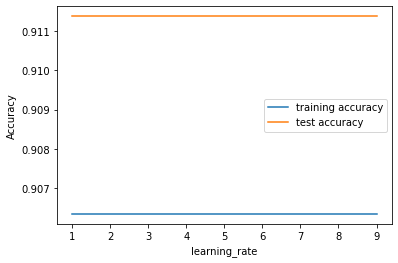

In [70]:

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

In [71]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('CatBoost Classifier',acc_test_cat,f1_score_test_cat,
             recall_score_train_cat,precision_score_train_cat)

In [72]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier()

# fit the model 
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [73]:
#predicting the target value from the model for the samples
y_train_xgb = xgb.predict(X_train)
y_test_xgb = xgb.predict(X_test)

In [74]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_xgb = metrics.accuracy_score(y_train,y_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_test,y_test_xgb)
print("XGBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print()

f1_score_train_xgb = metrics.f1_score(y_train,y_train_xgb)
f1_score_test_xgb = metrics.f1_score(y_test,y_test_xgb)
print("XGBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_xgb))
print("XGBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_xgb))
print()

recall_score_train_xgb = metrics.recall_score(y_train,y_train_xgb)
recall_score_test_xgb = metrics.recall_score(y_test,y_test_xgb)
print("XGBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_xgb))
print("XGBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_train_xgb))
print()

precision_score_train_xgb = metrics.precision_score(y_train,y_train_xgb)
precision_score_test_xgb = metrics.precision_score(y_test,y_test_xgb)
print("XGBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_xgb))
print("XGBoost Classifier : precision on test Data: {:.3f}".format(precision_score_train_xgb))

XGBoost Classifier : Accuracy on training Data: 0.906
XGBoost Classifier : Accuracy on test Data: 0.911

XGBoost Classifier : f1_score on training Data: 0.898
XGBoost Classifier : f1_score on test Data: 0.902

XGBoost Classifier : Recall on training Data: 0.822
XGBoost Classifier : Recall on test Data: 0.822

XGBoost Classifier : precision on training Data: 0.989
XGBoost Classifier : precision on test Data: 0.989


In [75]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('XGBoost Classifier',acc_test_xgb,f1_score_test_xgb,
             recall_score_train_xgb,precision_score_train_xgb)

In [76]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit the model 
mlp.fit(X_train,y_train)

MLPClassifier()

In [77]:
#predicting the target value from the model for the samples
y_train_mlp = mlp.predict(X_train)
y_test_mlp = mlp.predict(X_test)

In [78]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_mlp  = metrics.accuracy_score(y_train,y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multi-layer Perceptron : Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print()

f1_score_train_mlp = metrics.f1_score(y_train,y_train_mlp)
f1_score_test_mlp = metrics.f1_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : f1_score on training Data: {:.3f}".format(f1_score_train_mlp))
print("Multi-layer Perceptron : f1_score on test Data: {:.3f}".format(f1_score_train_mlp))
print()

recall_score_train_mlp = metrics.recall_score(y_train,y_train_mlp)
recall_score_test_mlp = metrics.recall_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Recall on training Data: {:.3f}".format(recall_score_train_mlp))
print("Multi-layer Perceptron : Recall on test Data: {:.3f}".format(recall_score_test_mlp))
print()

precision_score_train_mlp = metrics.precision_score(y_train,y_train_mlp)
precision_score_test_mlp = metrics.precision_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : precision on training Data: {:.3f}".format(precision_score_train_mlp))
print("Multi-layer Perceptron : precision on test Data: {:.3f}".format(precision_score_test_mlp))

Multi-layer Perceptron : Accuracy on training Data: 0.906
Multi-layer Perceptron : Accuracy on test Data: 0.911

Multi-layer Perceptron : f1_score on training Data: 0.898
Multi-layer Perceptron : f1_score on test Data: 0.898

Multi-layer Perceptron : Recall on training Data: 0.822
Multi-layer Perceptron : Recall on test Data: 0.830

Multi-layer Perceptron : precision on training Data: 0.989
Multi-layer Perceptron : precision on test Data: 0.988


In [79]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
             recall_score_train_mlp,precision_score_train_mlp)

In [80]:
from keras.layers import Input, Dense
from keras.models import Model

input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)
decoder = Dense(encoding_dim, activation='relu')(decoder)
output_layer = Dense(input_dim, activation='sigmoid')(decoder)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.summary()

autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 4)                 28        
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
 dense_3 (Dense)             (None, 4)                 12        
                                                                 
 dense_4 (Dense)             (None, 6)                 30        
                                                                 
 dense_5 (Dense)             (None, 6)                 42    

In [81]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))

250/250 [==============================] - 1s 2ms/step - loss: -7533233.5000 - accuracy: 0.6561

Autoencoder: Accuracy on training Data: 0.654
Autoencoder: Accuracy on test Data: 0.656


In [82]:
from sklearn.ensemble import AdaBoostClassifier

# Create Decision Tree classifer object
clf = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train Decision Tree Classifer
clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [83]:
clf.score(X_train, y_train)

0.90103125

In [84]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.906875


In [85]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      4058
           1       0.98      0.83      0.90      3942

    accuracy                           0.91      8000
   macro avg       0.92      0.91      0.91      8000
weighted avg       0.92      0.91      0.91      8000



<AxesSubplot:>

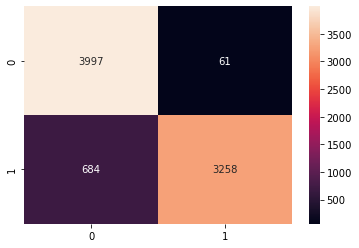

In [86]:
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt='0.0f')

In [87]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [88]:
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.904,0.892,0.798,0.994
1,K-Nearest Neighbors,0.908,0.900,0.826,0.981
2,Support Vector Machine,0.909,0.900,0.819,0.989
3,Naive Bayes Classifier,0.902,0.891,0.800,0.987
4,Decision Tree,0.911,0.902,0.822,0.989
5,Random Forest,0.911,0.902,0.822,0.989
6,Gradient Boosting Classifier,0.911,0.902,0.822,0.989
7,CatBoost Classifier,0.911,0.902,0.822,0.989
8,XGBoost Classifier,0.911,0.902,0.822,0.989
9,Multi-layer Perceptron,0.911,0.902,0.822,0.989


In [89]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [90]:
# dispalying total result
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Decision Tree,0.911,0.902,0.822,0.989
1,Random Forest,0.911,0.902,0.822,0.989
2,Gradient Boosting Classifier,0.911,0.902,0.822,0.989
3,CatBoost Classifier,0.911,0.902,0.822,0.989
4,XGBoost Classifier,0.911,0.902,0.822,0.989
5,Multi-layer Perceptron,0.911,0.902,0.822,0.989
6,Support Vector Machine,0.909,0.900,0.819,0.989
7,K-Nearest Neighbors,0.908,0.900,0.826,0.981
8,Logistic Regression,0.904,0.892,0.798,0.994
9,Naive Bayes Classifier,0.902,0.891,0.800,0.987


In [91]:
# from sklearn.ensemble import VotingClassifier
# model_1 = RandomForestClassifier(n_estimators=10)
# # model_2 = KNeighborsClassifier(n_neighbors=1)
# # model_3 = LogisticRegression(random_state=0)
# # # model_4 = BernoulliNB()
# model_5 = DecisionTreeClassifier()
# ensemble = VotingClassifier(estimators=[('RandomForest', model_1),('DT', model_5)], voting='hard')
from sklearn.ensemble import VotingClassifier
model_1 = RandomForestClassifier(n_estimators=10)
model_2 = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)
model_3 =  XGBClassifier()
model_4 = CatBoostClassifier(learning_rate  = 0.1)
model_5 = DecisionTreeClassifier()
ensemble = VotingClassifier(estimators=[('RandomForest', model_1),('Gradientboosting',model_2),
                                        ('xgbclassifier',model_3),('catboost',model_4),
                                        ('DT', model_5)], voting='hard')

In [92]:
import time
ensemble.fit(X_train, y_train)
start_time = time.time()
y_pred_test = ensemble.predict(X_test)
end_time = time.time()
duration = end_time - start_time
print('Time taken by model:', duration, 'seconds')
y_pred_train = ensemble.predict(X_train)

0:	learn: 0.5459018	total: 14.3ms	remaining: 14.2s
1:	learn: 0.4555833	total: 26.5ms	remaining: 13.2s
2:	learn: 0.3978666	total: 40ms	remaining: 13.3s
3:	learn: 0.3550645	total: 54.2ms	remaining: 13.5s
4:	learn: 0.3321026	total: 64.5ms	remaining: 12.8s
5:	learn: 0.3161088	total: 75.4ms	remaining: 12.5s
6:	learn: 0.2997705	total: 87.1ms	remaining: 12.4s
7:	learn: 0.2919413	total: 96.3ms	remaining: 11.9s
8:	learn: 0.2817600	total: 107ms	remaining: 11.8s
9:	learn: 0.2741357	total: 118ms	remaining: 11.7s
10:	learn: 0.2675884	total: 129ms	remaining: 11.6s
11:	learn: 0.2628243	total: 141ms	remaining: 11.6s
12:	learn: 0.2591509	total: 152ms	remaining: 11.6s
13:	learn: 0.2567529	total: 165ms	remaining: 11.6s
14:	learn: 0.2544476	total: 176ms	remaining: 11.6s
15:	learn: 0.2514811	total: 188ms	remaining: 11.6s
16:	learn: 0.2495295	total: 200ms	remaining: 11.5s
17:	learn: 0.2476845	total: 213ms	remaining: 11.6s
18:	learn: 0.2458388	total: 227ms	remaining: 11.7s
19:	learn: 0.2447020	total: 241ms	r

173:	learn: 0.2322919	total: 2.01s	remaining: 9.53s
174:	learn: 0.2322919	total: 2.02s	remaining: 9.51s
175:	learn: 0.2322919	total: 2.03s	remaining: 9.49s
176:	learn: 0.2322919	total: 2.04s	remaining: 9.48s
177:	learn: 0.2322919	total: 2.05s	remaining: 9.46s
178:	learn: 0.2322919	total: 2.06s	remaining: 9.45s
179:	learn: 0.2322919	total: 2.07s	remaining: 9.43s
180:	learn: 0.2322919	total: 2.08s	remaining: 9.4s
181:	learn: 0.2322919	total: 2.09s	remaining: 9.38s
182:	learn: 0.2322919	total: 2.1s	remaining: 9.36s
183:	learn: 0.2322919	total: 2.11s	remaining: 9.34s
184:	learn: 0.2322919	total: 2.12s	remaining: 9.33s
185:	learn: 0.2322919	total: 2.13s	remaining: 9.31s
186:	learn: 0.2322919	total: 2.14s	remaining: 9.29s
187:	learn: 0.2322919	total: 2.15s	remaining: 9.27s
188:	learn: 0.2322919	total: 2.16s	remaining: 9.25s
189:	learn: 0.2322919	total: 2.17s	remaining: 9.23s
190:	learn: 0.2322919	total: 2.18s	remaining: 9.22s
191:	learn: 0.2322919	total: 2.19s	remaining: 9.2s
192:	learn: 0.2

347:	learn: 0.2322919	total: 3.79s	remaining: 7.09s
348:	learn: 0.2322919	total: 3.8s	remaining: 7.08s
349:	learn: 0.2322919	total: 3.81s	remaining: 7.07s
350:	learn: 0.2322919	total: 3.82s	remaining: 7.06s
351:	learn: 0.2322919	total: 3.83s	remaining: 7.04s
352:	learn: 0.2322919	total: 3.84s	remaining: 7.03s
353:	learn: 0.2322919	total: 3.85s	remaining: 7.02s
354:	learn: 0.2322919	total: 3.86s	remaining: 7.01s
355:	learn: 0.2322919	total: 3.87s	remaining: 6.99s
356:	learn: 0.2322919	total: 3.88s	remaining: 6.98s
357:	learn: 0.2322919	total: 3.88s	remaining: 6.96s
358:	learn: 0.2322919	total: 3.89s	remaining: 6.95s
359:	learn: 0.2322919	total: 3.9s	remaining: 6.94s
360:	learn: 0.2322919	total: 3.91s	remaining: 6.93s
361:	learn: 0.2322919	total: 3.92s	remaining: 6.91s
362:	learn: 0.2322919	total: 3.93s	remaining: 6.9s
363:	learn: 0.2322919	total: 3.94s	remaining: 6.89s
364:	learn: 0.2322919	total: 3.95s	remaining: 6.88s
365:	learn: 0.2322919	total: 3.96s	remaining: 6.86s
366:	learn: 0.2

518:	learn: 0.2322919	total: 5.53s	remaining: 5.12s
519:	learn: 0.2322919	total: 5.54s	remaining: 5.11s
520:	learn: 0.2322919	total: 5.55s	remaining: 5.1s
521:	learn: 0.2322919	total: 5.56s	remaining: 5.09s
522:	learn: 0.2322919	total: 5.57s	remaining: 5.08s
523:	learn: 0.2322919	total: 5.58s	remaining: 5.07s
524:	learn: 0.2322919	total: 5.59s	remaining: 5.06s
525:	learn: 0.2322919	total: 5.6s	remaining: 5.05s
526:	learn: 0.2322919	total: 5.61s	remaining: 5.04s
527:	learn: 0.2322919	total: 5.62s	remaining: 5.02s
528:	learn: 0.2322919	total: 5.63s	remaining: 5.01s
529:	learn: 0.2322919	total: 5.64s	remaining: 5s
530:	learn: 0.2322919	total: 5.65s	remaining: 4.99s
531:	learn: 0.2322919	total: 5.66s	remaining: 4.98s
532:	learn: 0.2322919	total: 5.67s	remaining: 4.97s
533:	learn: 0.2322919	total: 5.68s	remaining: 4.95s
534:	learn: 0.2322919	total: 5.69s	remaining: 4.94s
535:	learn: 0.2322919	total: 5.7s	remaining: 4.93s
536:	learn: 0.2322919	total: 5.71s	remaining: 4.92s
537:	learn: 0.2322

693:	learn: 0.2322919	total: 7.25s	remaining: 3.2s
694:	learn: 0.2322919	total: 7.26s	remaining: 3.19s
695:	learn: 0.2322919	total: 7.28s	remaining: 3.18s
696:	learn: 0.2322919	total: 7.28s	remaining: 3.17s
697:	learn: 0.2322919	total: 7.29s	remaining: 3.16s
698:	learn: 0.2322919	total: 7.31s	remaining: 3.15s
699:	learn: 0.2322919	total: 7.32s	remaining: 3.13s
700:	learn: 0.2322919	total: 7.33s	remaining: 3.13s
701:	learn: 0.2322919	total: 7.34s	remaining: 3.12s
702:	learn: 0.2322919	total: 7.35s	remaining: 3.1s
703:	learn: 0.2322919	total: 7.36s	remaining: 3.09s
704:	learn: 0.2322919	total: 7.37s	remaining: 3.08s
705:	learn: 0.2322919	total: 7.38s	remaining: 3.07s
706:	learn: 0.2322919	total: 7.39s	remaining: 3.06s
707:	learn: 0.2322919	total: 7.4s	remaining: 3.05s
708:	learn: 0.2322919	total: 7.41s	remaining: 3.04s
709:	learn: 0.2322919	total: 7.42s	remaining: 3.03s
710:	learn: 0.2322919	total: 7.44s	remaining: 3.02s
711:	learn: 0.2322919	total: 7.45s	remaining: 3.01s
712:	learn: 0.2

857:	learn: 0.2322919	total: 8.99s	remaining: 1.49s
858:	learn: 0.2322919	total: 9.01s	remaining: 1.48s
859:	learn: 0.2322919	total: 9.02s	remaining: 1.47s
860:	learn: 0.2322919	total: 9.03s	remaining: 1.46s
861:	learn: 0.2322919	total: 9.04s	remaining: 1.45s
862:	learn: 0.2322919	total: 9.05s	remaining: 1.44s
863:	learn: 0.2322919	total: 9.06s	remaining: 1.43s
864:	learn: 0.2322919	total: 9.07s	remaining: 1.42s
865:	learn: 0.2322919	total: 9.08s	remaining: 1.4s
866:	learn: 0.2322919	total: 9.09s	remaining: 1.39s
867:	learn: 0.2322919	total: 9.1s	remaining: 1.38s
868:	learn: 0.2322919	total: 9.11s	remaining: 1.37s
869:	learn: 0.2322919	total: 9.12s	remaining: 1.36s
870:	learn: 0.2322919	total: 9.13s	remaining: 1.35s
871:	learn: 0.2322919	total: 9.14s	remaining: 1.34s
872:	learn: 0.2322919	total: 9.15s	remaining: 1.33s
873:	learn: 0.2322919	total: 9.16s	remaining: 1.32s
874:	learn: 0.2322919	total: 9.17s	remaining: 1.31s
875:	learn: 0.2322919	total: 9.18s	remaining: 1.3s
876:	learn: 0.2

In [94]:
from sklearn.metrics import accuracy_score
train_accurry = accuracy_score(y_pred_train, y_train)
test_accurry = accuracy_score(y_pred_test, y_test)
print('Accuracy for train dataset : ', train_accurry)
print('Accuracy for test dataset', test_accurry)

Accuracy for train dataset :  0.90634375
Accuracy for test dataset 0.911375


In [97]:
# import pickle
# filename = 'finalized_model.sav'
# pickle.dump(ensemble, open(filename, 'wb'))

In [104]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [105]:
import os
import pickle

if not os.path.exists('pickle'):
    os.makedirs('pickle')

# dump information to that file
pickle.dump(gbc, open('pickle/gbc.pkl', 'wb'))

In [102]:
# current_directory = os.getcwd()

In [103]:
# #checking the feature improtance in the model
# plt.figure(figsize=(9,7))
# n_features = X_train.shape[1]
# plt.barh(range(n_features), gbc.feature_importances_, align='center')
# plt.yticks(np.arange(n_features), X_train.columns)
# plt.title("Feature importances using permutation on full model")
# plt.xlabel("Feature importance")
# plt.ylabel("Feature")
# plt.show()